# Objective
- Identify key factors that contribute to employee turnover, perform predictive modeling to assess employees who are most likely to leave, and provide insights for developing targeted retention strategies based on demographics, performance metrics, job satisfaction levels, and other relevant employee data. This type of project would ultimately help HR departments to proactively address potential attrition risks and improve employee retention rates.


# Method of Analysis
- **Classification**
  -  Analyze the various employee factors and variables to predict whether an employee is likely to leave the company, essentially classifying them as "attritted" or "not attritted" based on the input data.
  - Dependent/Target Feature: `Attrition`
  - Independent/Explanatory Features: All the features in the dataset EXCEPT for `Employee ID` and `Attrition`
  - ML Techniques: **Logistic Regression, Random Forest along with applying GridSearch**

- **Clustering** (*Additional*)
    - By applying clustering algorithms to employee attrition data, we can identify distinct groups of employees with similar characteristics that are more likely to leave.
    - ML Technique: **K-Means Clustering**


# Dataset Information
### Column Descriptions:
1.	`Employee_ID`: Unique identifier for each employee.
2.	`Age`: Age of the employee.
3.	`Gender`: Gender of the employee.
4.	`Marital_Status`: Marital status of the employee (Single, Married, Divorced).
5.	`Department`: Department the employee works in (e.g., HR, IT, Sales, Marketing).
6.	`Job_Role`: Specific role within the department (e.g., Manager, Analyst).
7.	`Job_Level`: Level in the organizational hierarchy.
8.	`Monthly_Income`: Monthly salary of the employee.
9.	`Hourly_Rate`: Rate per hour for hourly employees.
10.	`Years_at_Company`: Number of years the employee has been with the company.
11.	`Years_in_Current_Role`: Number of years the employee has been in their current role.
12.	`Years_Since_Last_Promotion`: Time since the employee’s last promotion.
13.	`Work_Life_Balance`: Rating of work-life balance.
14.	`Job_Satisfaction`: Rating of job satisfaction (1-5 scale).
15.	`Performance_Rating`: Performance rating (1-5 scale).
16.	`Training_Hours_Last_Year`: Number of training hours completed in the past year.
17.	`Overtime`: Whether the employee works overtime (Yes/No).
18.	`Project_Count`: Number of projects managed by the employee.
19.	`Average_Hours_Worked_Per_Week`: Average working hours per week.
20.	`Absenteeism`: Number of days the employee was absent in the past year.
21.	`Work_Environment_Satisfaction`: Rating of work environment satisfaction.
22.	`Relationship_with_Manager`: Rating of the relationship with the manager.
23.	`Job_Involvement`: Rating of job involvement.
24.	`Distance_From_Home`: Distance from home to the workplace (in kilometers).
25.	`Number_of_Companies_Worked`: No. of companies the employee has worked for.
26.	`Attrition`: (Yes/No), the target variable indicating whether the employee left the company.

### Independent Variables:
- All the features in the dataset **EXCEPT** for `Employee ID` and `Attrition`

### Dependent Variable:
- `Attrition`: (Yes/No), the target feature indicating whether the employee left the company.

### Dataset Source:
- https://www.kaggle.com/datasets/ziya07/employee-attrition-prediction-dataset



---


---

# Data Preprocessing

### Load dataset

In [1]:
# Import required libraries
import pyspark.pandas as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#set plotting backend to matplotlib instead of plotly
ps.set_option('plotting.backend', 'matplotlib')

# set max rows for visualizations
ps.set_option('compute.max_rows', 10000)
ps.set_option("display.max_rows", 10000)


VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
2,application_1746678343741_0003,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
# Read data into pyspark dataframe
df = ps.read_csv('s3://spark-bucket-adamchua/studio/project_dataset/employee_attrition_dataset.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt/yarn/usercache/livy/appcache/application_1746678343741_0003/container_1746678343741_0003_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.

In [3]:
# Show first 5 rows
df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  Job_Satisfaction  Performance_Rating  Training_Hours_Last_Year Overtime  Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  Work_Environment_Satisfaction  Relationship_with_Manager  Job_Involvement  Distance_From_Home  Number_of_Companies_Worked Attrition
0            1   58    Male         Single    Finance    Manager          5            7332           81                24                     12                           3                  1                 3                   2                        74       No              9                             48           16                              4                          1                1                  49                           3        No
1            2   48  Female       Divorced         HR  Assistant          4         

In [4]:
# Display dataset information
df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int32 
 1   Age                            10000 non-null  int32 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int32 
 7   Monthly_Income                 10000 non-null  int32 
 8   Hourly_Rate                    10000 non-null  int32 
 9   Years_at_Company               10000 non-null  int32 
 10  Years_in_Current_Role          10000 non-null  int32 
 11  Years_Since_Last_Promotion     10000 non-null  int32 
 12  Work_Life_Balance              10000 non-null  int32 
 13 

- Dataset information shows numerical features are the majority.

## Inspecting and Handling Duplicates

### Exact duplicates

In [5]:
# Inspect to see if we have any rows that are duplicated
print(df.shape[0], df.to_spark().distinct().count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

10000 10000
/mnt/yarn/usercache/livy/appcache/application_1746678343741_0003/container_1746678343741_0003_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

- Results show 10,000 total rows and 10,000 are all distinct
- This indicates that there are NO duplicates

### Duplicates where only ID differs

In [6]:
# Remove ID column, then count total rows and distinct to inspect possible duplicates
no_ids = (
    df[[col for col in df.columns if col != 'Employee_ID']]
)

no_ids.shape[0], no_ids.to_spark().distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(10000, 10000)

- Results show 10,000 total rows and 10,000 are all distinct
- Again, this indicates that there are NO duplicates

### Inspect Duplicated ID's

In [7]:
# Inspect if there are duplicaed IDs
df.shape[0], df['Employee_ID'].nunique()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(10000, 10000)

- Results show 10,000 total rows and 10,000 are all distinct
- Again, this indicates that there are NO duplicates

## Inspecting and Handling Missing Values

### Missing values per row

In [8]:
# Examine if there are any rows with missing values (across rows)
# axis=1, which are columns, because you want to collapse the columns
x = df.isna().sum(axis=1)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
x[x >= 1].shape[0]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
An error occurred while calling o893.count.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 44.0 failed 4 times, most recent failure: Lost task 0.3 in stage 44.0 (TID 36) (ip-172-31-17-208.ec2.internal executor 1): java.lang.RuntimeException: Failed to run command: /usr/bin/virtualenv -p python3 --no-pip --system-site-packages virtualenv_application_1746678343741_0003_0
	at org.apache.spark.api.python.VirtualEnvFactory.execCommand(VirtualEnvFactory.scala:125)
	at org.apache.spark.api.python.VirtualEnvFactory.setupVirtualEnv(VirtualEnvFactory.scala:83)
	at org.apache.spark.api.python.PythonWorkerFactory.<init>(PythonWorkerFactory.scala:95)
	at org.apache.spark.SparkEnv.$anonfun$createPythonWorker$1(SparkEnv.scala:128)
	at scala.collection.mutable.HashMap.getOrElseUpdate(HashMap.scala:86)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:128)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.

- Result shows 0 missing values across rows
- We can proceed to check missing values across columns

### Missing values per column

In [10]:
# Count percentage of missing values in each column
# axis=0, which is rows, because you want to collapse the rows
# this gives percentage of null values in each column

df.isna().sum(axis=0) / (df.shape[0])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Employee_ID                      0.0
Age                              0.0
Gender                           0.0
Marital_Status                   0.0
Department                       0.0
Job_Role                         0.0
Job_Level                        0.0
Monthly_Income                   0.0
Hourly_Rate                      0.0
Years_at_Company                 0.0
Years_in_Current_Role            0.0
Years_Since_Last_Promotion       0.0
Work_Life_Balance                0.0
Job_Satisfaction                 0.0
Performance_Rating               0.0
Training_Hours_Last_Year         0.0
Overtime                         0.0
Project_Count                    0.0
Average_Hours_Worked_Per_Week    0.0
Absenteeism                      0.0
Work_Environment_Satisfaction    0.0
Relationship_with_Manager        0.0
Job_Involvement                  0.0
Distance_From_Home               0.0
Number_of_Companies_Worked       0.0
Attrition                        0.0
dtype: float64

- Results show all columns have 0% or no null values for each
- Since there are no missing values across both row and columns, there's no need for imputation.

## General Descriptive Statistics

In [11]:
# Describe numeric features
df.describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

       Employee_ID           Age     Job_Level  Monthly_Income   Hourly_Rate  Years_at_Company  Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  Job_Satisfaction  Performance_Rating  Training_Hours_Last_Year  Project_Count  Average_Hours_Worked_Per_Week   Absenteeism  Work_Environment_Satisfaction  Relationship_with_Manager  Job_Involvement  Distance_From_Home  Number_of_Companies_Worked
count  10000.00000  10000.000000  10000.000000    10000.000000  10000.000000      10000.000000           10000.000000                10000.000000       10000.000000      10000.000000        10000.000000              10000.000000   10000.000000                   10000.000000  10000.000000                   10000.000000               10000.000000     10000.000000        10000.000000                10000.000000
mean    5000.50000     39.561800      2.990800    11436.716700     57.032300         14.936200               7.451300                    4.471900           2.502400          3.

In [12]:
# Transposed view
df.describe().transpose()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                 count        mean          std     min     25%      50%      75%      max
Employee_ID                    10000.0   5000.5000  2886.895680     1.0  2499.0   4999.0   7499.0  10000.0
Age                            10000.0     39.5618    11.454986    20.0    30.0     40.0     49.0     59.0
Job_Level                      10000.0      2.9908     1.410643     1.0     2.0      3.0      4.0      5.0
Monthly_Income                 10000.0  11436.7167  4926.528302  3000.0  7179.0  11400.0  15677.0  19999.0
Hourly_Rate                    10000.0     57.0323    24.703261    15.0    36.0     57.0     78.0     99.0
Years_at_Company               10000.0     14.9362     8.431657     1.0     8.0     15.0     22.0     29.0
Years_in_Current_Role          10000.0      7.4513     4.042903     1.0     4.0      7.0     11.0     14.0
Years_Since_Last_Promotion     10000.0      4.4719     2.891617     0.0     2.0      4.0      7.0      9.0
Work_Life_Balance              10000.

#### Mean and Standard Deviation:
- The mean values vary significantly across features, with some averaging between 2-5, while others go above 11,000. This suggests that different features measure data on very different scales.
- **This is due to the fact that many features have values that are based on a rating scale.**
- The standard deviation also varies widely. Some features have values that are closely around the mean, while others show large variations, indicating more dispersed data.

#### Min, Max and Percentiles:
- The minimum values range from 0 to 3,000, while the maximum values reach up to 19,999, emphasizing the presence of different scales across features.
- Looking at the percentiles, the 25% is quite low 1-3 for many features because of the rating scale they're based on. For some, the 75% goes into the thousands, because some of the features are based on larger scales, such as monthly income.

#### Distribution Observations:
- Several features appear to be right-skewed, meaning that while most values are small, there are some much larger values pulling the average towards the right or up.
- A few features, however, display a more balanced distribution, where the quartiles are more evenly spaced, meaning data points are more consistently spread.

### Computing Correlations

In [13]:
# Applying .corr() function to calculate correlation values
df.corr()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                               Employee_ID       Age  Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  Job_Satisfaction  Performance_Rating  Training_Hours_Last_Year  Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  Work_Environment_Satisfaction  Relationship_with_Manager  Job_Involvement  Distance_From_Home  Number_of_Companies_Worked
Employee_ID                       1.000000 -0.017412  -0.004516       -0.002726    -0.027243         -0.004183              -0.009809                   -0.007506           0.008876          0.005299           -0.010438                 -0.004727      -0.005757                       0.012884    -0.001592                       0.003619                  -0.003918        -0.000580           -0.008463                    0.008386
Age                              -0.017412  1.000000  -0.001506       -0.003342     0.021090         -0.011907               0.007994             

#### Interpretaion of Correlation Values:
- General Observations:
  - Most correlation values are quite low, indicating weak or no strong linear relationships between the variables.
  - No highly positive (close to 1) or highly negative (close to -1) correlations are present, meaning the dataset does not have obvious strong dependencies among features.
- Key Insights & Relationships:
  - `Work-Life Balance & Job Satisfaction` (0.008876): Although weak, there is a slight positive correlation, suggesting that employees with better work-life balance might experience marginally higher job satisfaction.
  - `Job Satisfaction & Performance Rating` (-0.010438): This weak negative correlation suggests that job satisfaction does not directly impact performance ratings in a significant way.
  - `Years Since Last Promotion & Work-Life Balance` (-0.007506): A slight negative correlation, which may indicate that employees who have not been promoted recently might feel a minor decrease in work-life balance.
  - `Distance from Home & Number of Companies Worked` (-0.018451): A weak negative correlation, which could mean employees who have worked for more companies might tend to live slightly closer to their workplace.
  - `Average Hours Worked Per Week & Absenteeism` (0.012884): A very weak positive correlation suggests that those working more hours per week may have slightly higher absenteeism, but the effect is negligible.

- An alternative approach for this could also be **performing scaling operations first** on the data before computing correlation values; it may be more effective that way.

## Data Visualization

### Histograms

In [14]:
# Define a function to plot histogram of numeric features
def plot_hist(df, features, n_rows, n_cols):
    fig, ax = plt.subplots(n_rows, n_cols,figsize=(16, 12))
    fig.suptitle("Histogram Set",fontsize=14, fontweight='semibold')
    fig.tight_layout(pad=1.5)
    for i in range(len(features)):
        df[features[i]].hist(ax=ax[i//n_cols, i%n_cols], title=features[i])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
# Remove Employee ID column
no_id_df = df.drop('Employee_ID', axis=1)

no_id_df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            10000 non-null  int32 
 1   Gender                         10000 non-null  object
 2   Marital_Status                 10000 non-null  object
 3   Department                     10000 non-null  object
 4   Job_Role                       10000 non-null  object
 5   Job_Level                      10000 non-null  int32 
 6   Monthly_Income                 10000 non-null  int32 
 7   Hourly_Rate                    10000 non-null  int32 
 8   Years_at_Company               10000 non-null  int32 
 9   Years_in_Current_Role          10000 non-null  int32 
 10  Years_Since_Last_Promotion     10000 non-null  int32 
 11  Work_Life_Balance              10000 non-null  int32 
 12  Job_Satisfaction               10000 non-null  int32 
 13 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

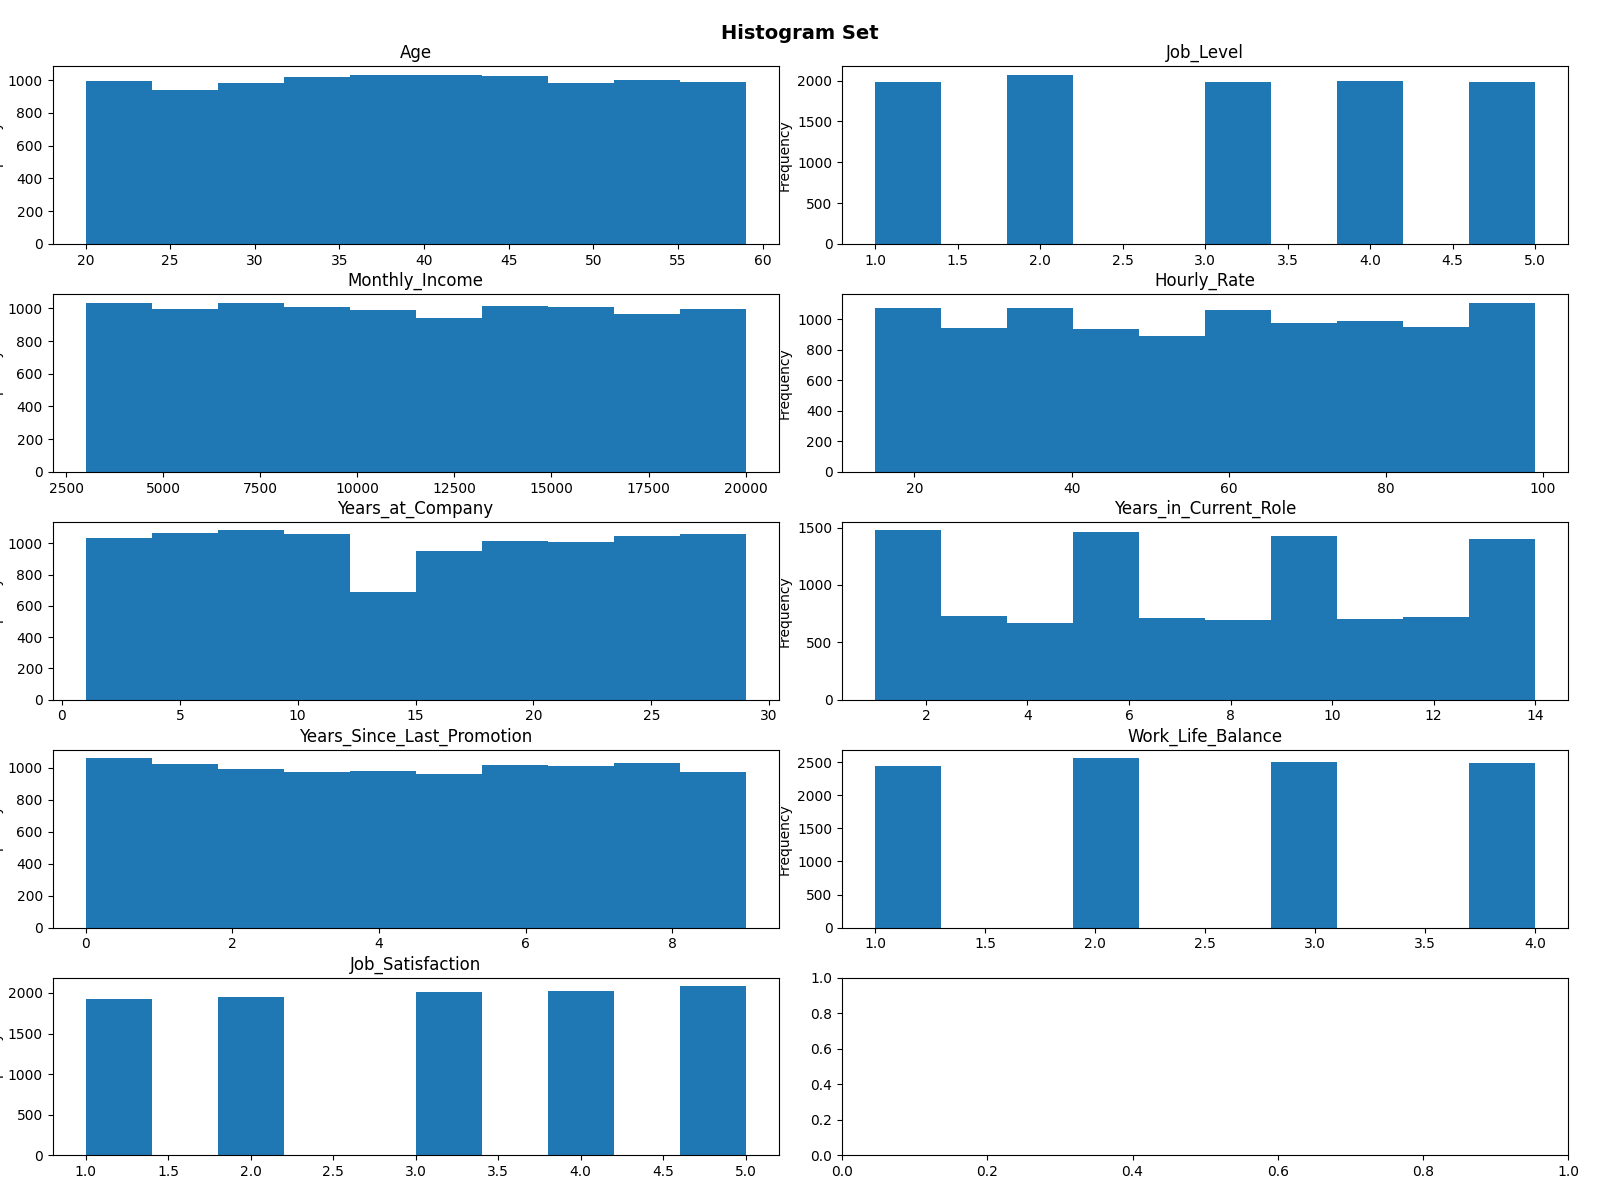

In [16]:
# Isolate numerical features
num_features = no_id_df.select_dtypes(include='int32').columns.tolist()

# Apply custom function for histograms
# Plot first half
plt.clf()
plot_hist(df=no_id_df, features=num_features[:9], n_rows=5, n_cols=2)
%matplot plt

### Interpretations:

-  `Age`: The distribution appears relatively uniform, suggesting that employees' ages are evenly spread across the range.
- `Job Level`: The distribution is discrete with five distinct levels, each having approximately equal frequency, indicating an even spread.
- `Monthly Income`: The income distribution is nearly uniform, meaning salaries are evenly distributed without significant skewness.
- `Hourly Rate`: The distribution is also roughly uniform, suggesting that employees receive a broad but evenly spread range of hourly wages.
- `Years at Company`: The distribution is mostly uniform, except for a slight dip in the middle, indicating a lower number of employees with mid-range tenure.
- `Years in Current Role`: The histogram shows gaps at certain intervals, implying certain clusters where employees tend to remain in their roles for specific durations.
- `Years Since Last Promotion`: The distribution is uniform, showing that promotions are spread evenly across employees over different years.
- `Work-Life Balance`: The data is discrete, with four distinct levels, each having roughly equal frequency, indicating a balanced distribution of work-life satisfaction ratings.
- `Job Satisfaction`: The ratings are evenly distributed across five levels, suggesting no strong bias toward dissatisfaction or satisfaction.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

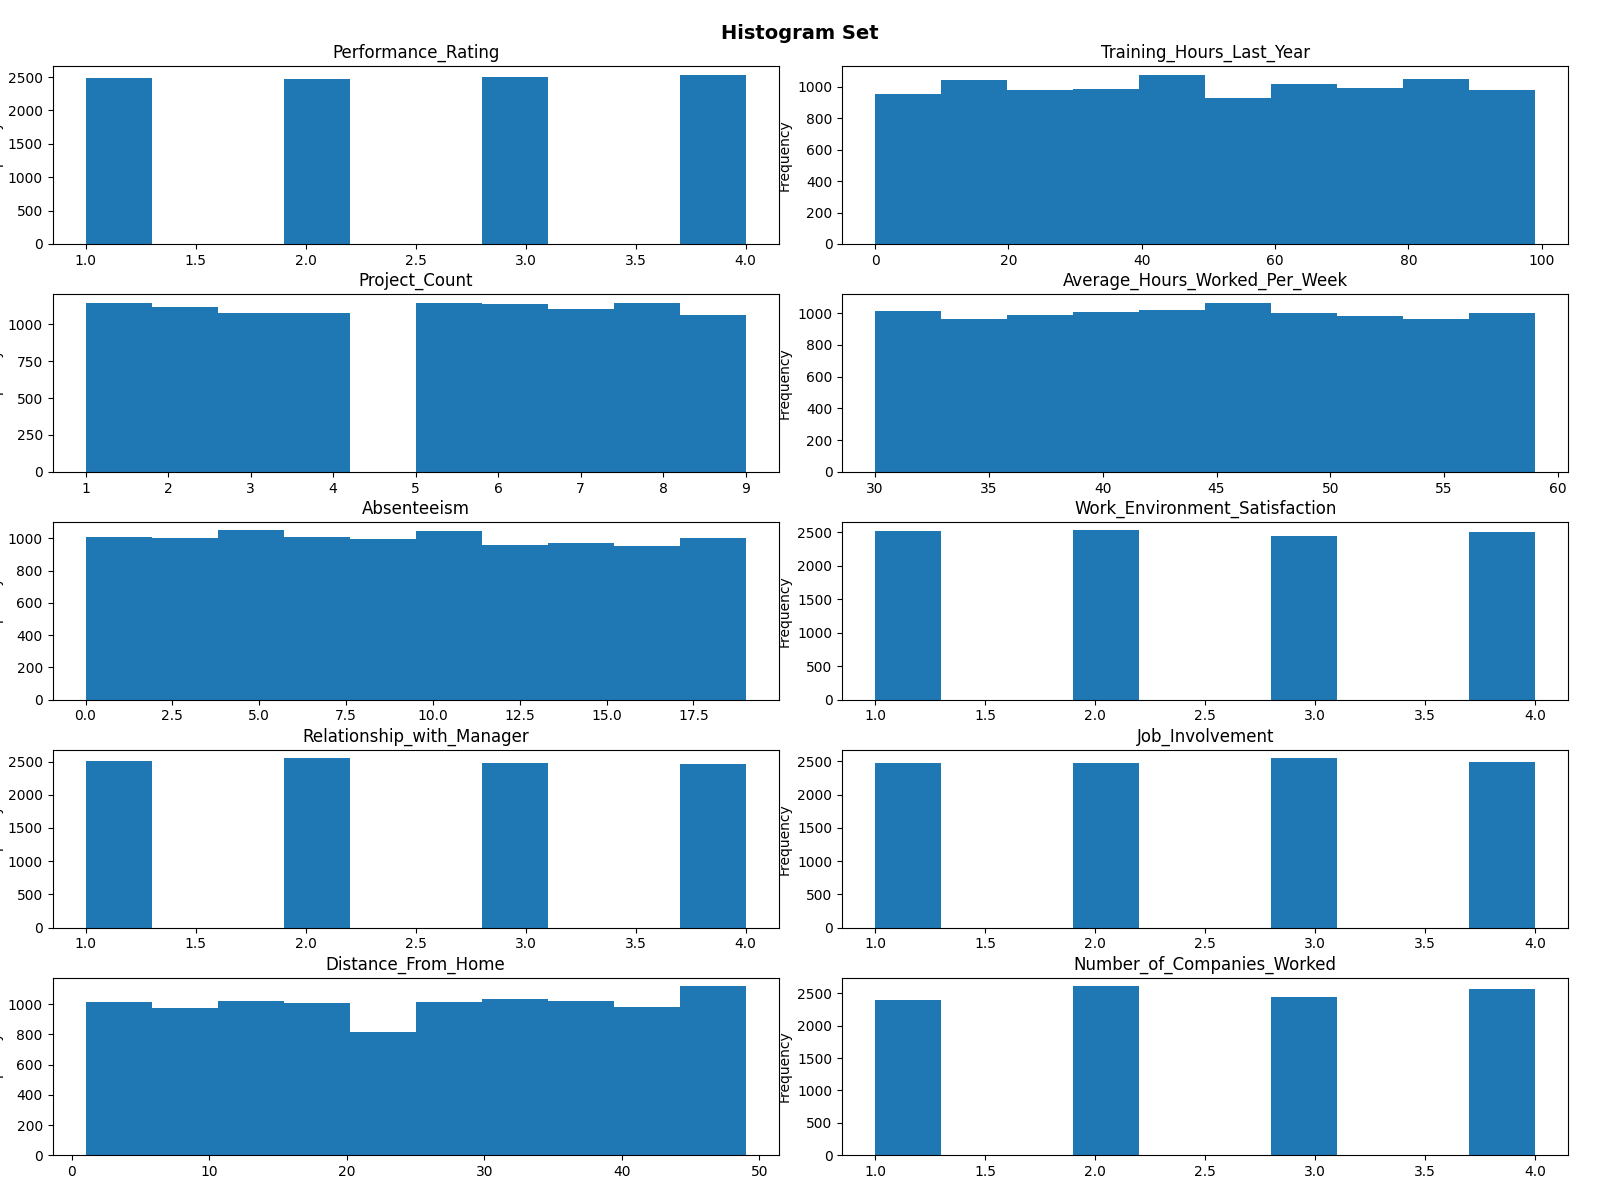

In [17]:
# Plot the second half
plt.clf()
plot_hist(df=no_id_df, features=num_features[9:], n_rows=5, n_cols=2)
%matplot plt

### Interpretations:
- `Performance Rating`: The ratings are evenly distributed across four categories, indicating no significant skewness in performance evaluations.
- `Training Hours Last Year`: The distribution appears uniform, suggesting employees received a fairly even spread of training hours.
- `Project Count`: The histogram is nearly uniform, meaning employees have similar range of project work without a clear concentration in any category.
- `Average Hours Worked Per Week`: The distribution is relatively even, implying employees work a balanced range of hours without extreme variations.
- `Absenteeism`: The histogram appears uniform, indicating employees' absenteeism is evenly spread over different values.
- `Work Environment Satisfaction`: The ratings are evenly distributed among four levels, showing no particular bias toward high or low satisfaction.
- `Relationship with Manager`: The distribution is discrete with equal frequencies across four levels, indicating balanced ratings for manager relationships.
- `Job Involvement`: The histogram shows an even distribution across four levels, suggesting no dominant trend or bias in job involvement ratings.
- `Distance from Home`: The values are quite uniformly spread, meaning employees live at varying distances and is not skewed in either end.
- `Number of Companies Worked`: The histogram shows equal distribution across categories, suggesting employees have varied past job experiences without a significant trend.

In [18]:
df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int32 
 1   Age                            10000 non-null  int32 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int32 
 7   Monthly_Income                 10000 non-null  int32 
 8   Hourly_Rate                    10000 non-null  int32 
 9   Years_at_Company               10000 non-null  int32 
 10  Years_in_Current_Role          10000 non-null  int32 
 11  Years_Since_Last_Promotion     10000 non-null  int32 
 12  Work_Life_Balance              10000 non-null  int32 
 13 

### Bar Charts for Categorical Columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

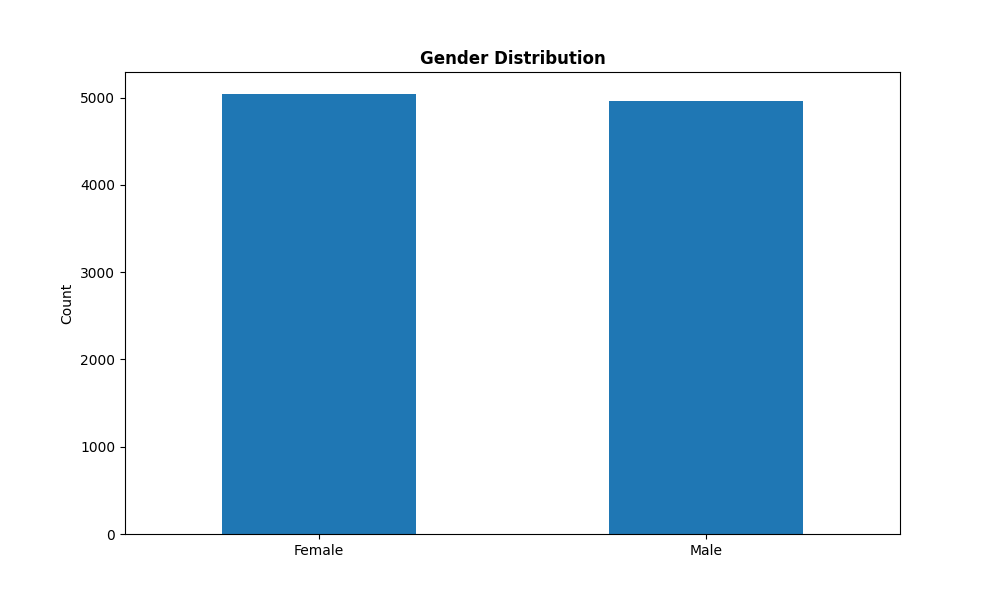

In [19]:
# Plot Gender Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Gender'].value_counts().plot.bar()
plt.title('Gender Distribution', fontweight='semibold')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Gender`: Both categories are quite evenly numbered and bars are about the same height, showing that there's a pretty even amount of both male and female, with female just having slightly more.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

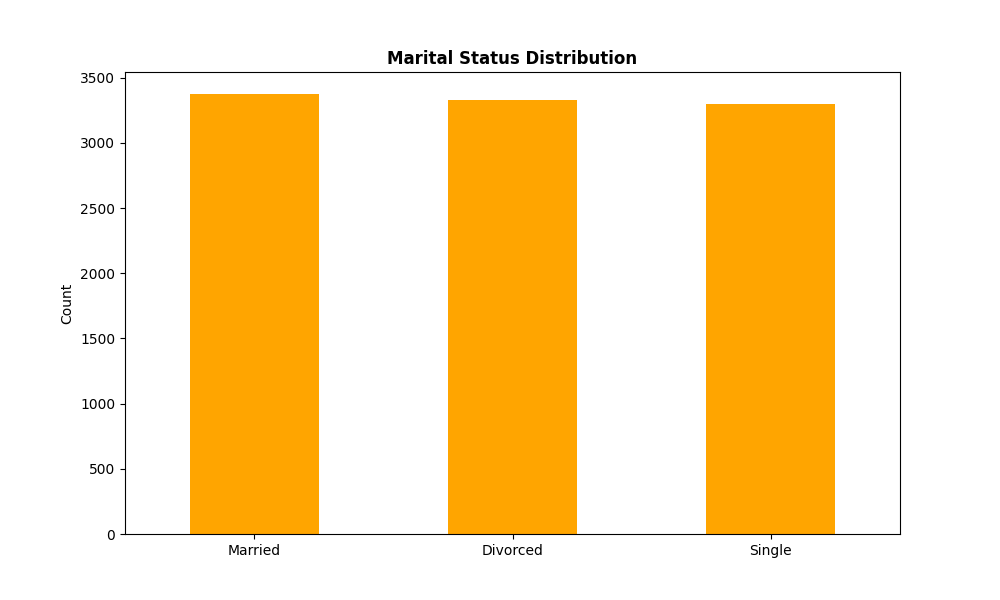

In [20]:
# Plot Marital Status Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Marital_Status'].value_counts().plot.bar(color='orange')
plt.title('Marital Status Distribution', fontweight='semibold')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Marital Status`: All three cateogries are quite evenly numbered and bars are about the same height, showing that all three are evenly spread across the dataset.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

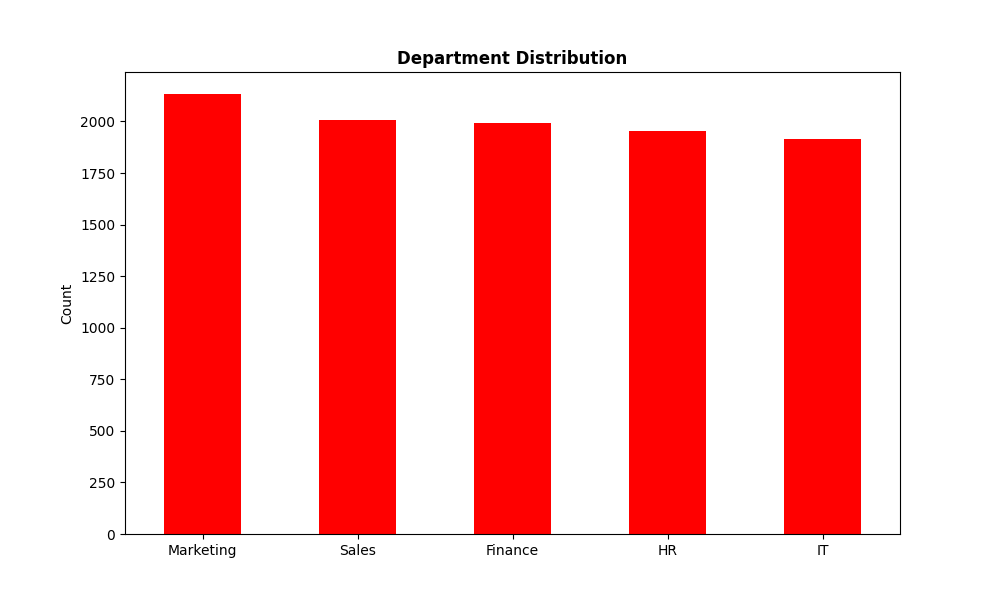

In [21]:
# Plot Department Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Department'].value_counts().plot.bar(color='red')
plt.title('Department Distribution', fontweight='semibold')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Department`: All categories have a good even spread, with Marketing having slighlty dominant numbers, and  the rest being evenly distributed.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

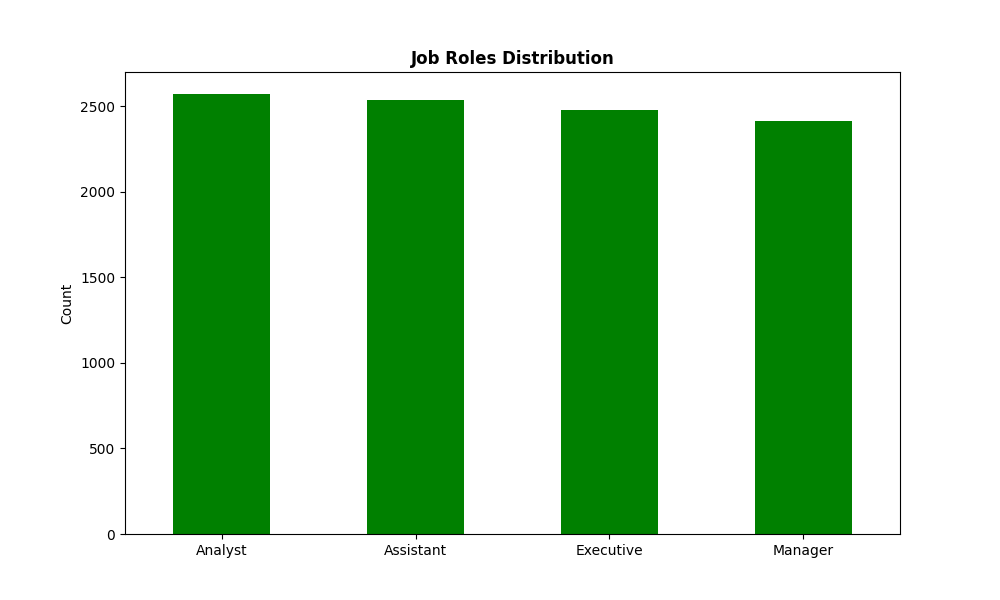

In [22]:
# Plot Job Roles Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Job_Role'].value_counts().plot.bar(color='green')
plt.title('Job Roles Distribution', fontweight='semibold')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Job Roles`: All categories are roughly even, with Analyst and Assistant roles having just slighlty dominant numbers, and decreasing trend towards Managerial roles, but the differences are not quite significant.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

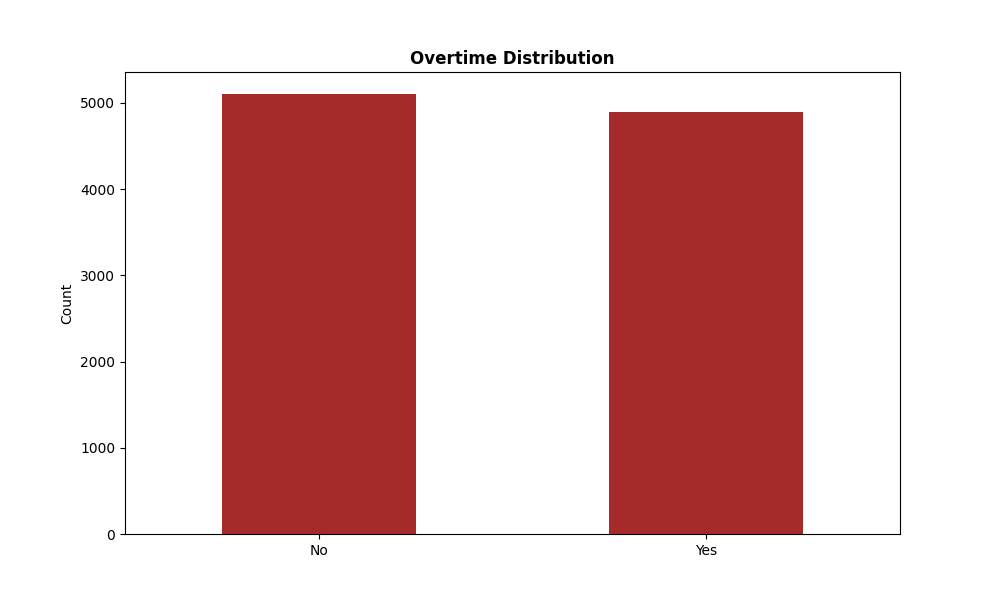

In [23]:
# Plot Overtime Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Overtime'].value_counts().plot.bar(color='brown')
plt.title('Overtime Distribution', fontweight='semibold')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Overtime`: People who did not take overtime have a slight dominance but the difference is not really that significant.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

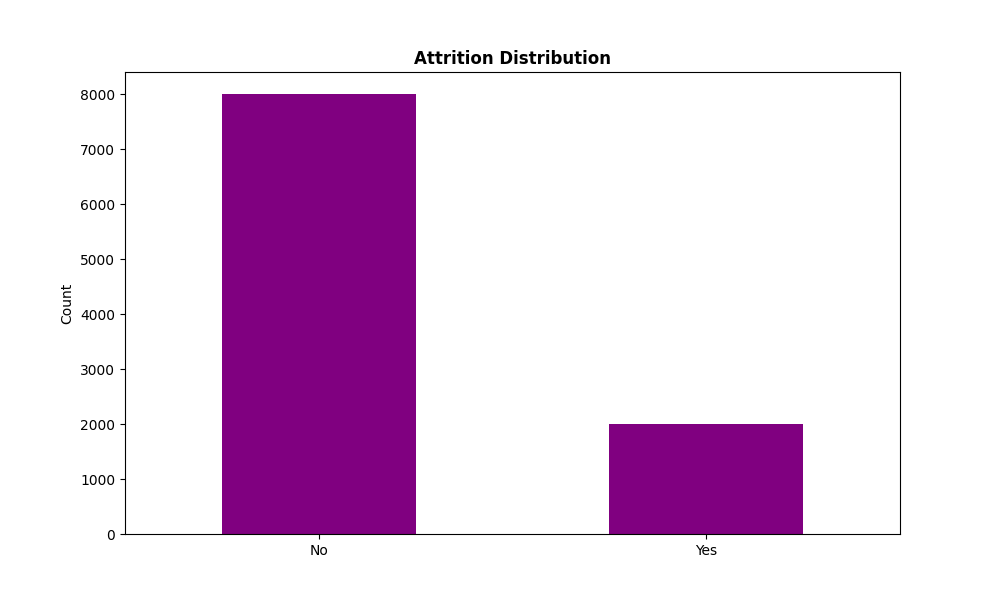

In [24]:
# Plot Attrition Distribution
plt.clf()
plt.figure(figsize=(10,6))
df['Attrition'].value_counts().plot.bar(color='purple')
plt.title('Attrition Distribution', fontweight='semibold')
plt.ylabel('Count')
plt.xticks(rotation=0)
%matplot plt

### Interpretation:
- `Attrition`: People who left the company appear to be a significantly dominant trend in the dataset; the difference is in the thousands.

### Scatterplots

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

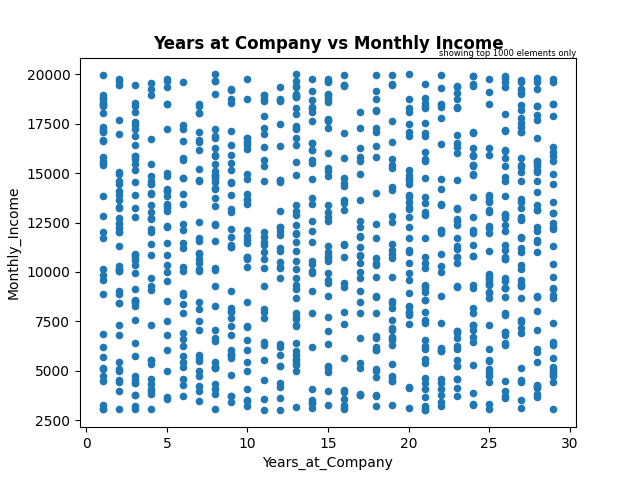

In [25]:
# Use Pandas scatter plot
# Plot Years at Company vs Monthly Income
plt.clf()
plt.figure(figsize=(10,6))
df.plot.scatter(x='Years_at_Company', y='Monthly_Income')
plt.title('Years at Company vs Monthly Income', fontweight='semibold')
%matplot plt

### Interpretation:
- `Years at Company vs Monthly Income`: Scatterplot shows no relationship at all, with data points being spread out all over the chart.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

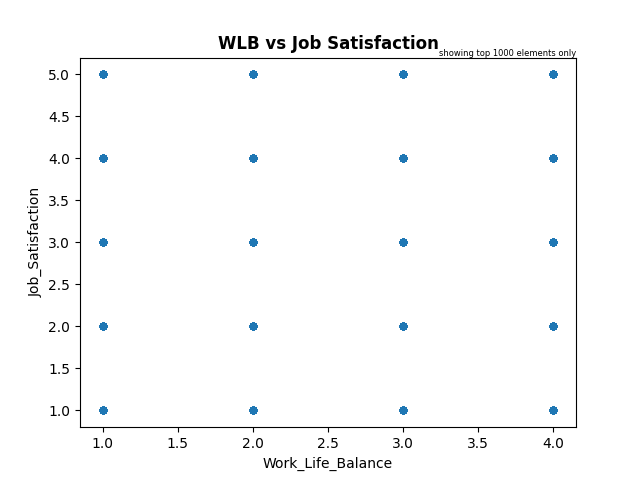

In [26]:
# Plot Work Life Balance and Job Satisfaction

plt.clf()
plt.figure(figsize=(10,6))
df.plot.scatter(x='Work_Life_Balance', y='Job_Satisfaction')
plt.title('WLB vs Job Satisfaction', fontweight='semibold')
%matplot plt

### Interpretation:
- `WLB vs Job Satisfaction`: Shows no relationship at all, with data points scattered around the chart, indicating that there's no linearity.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

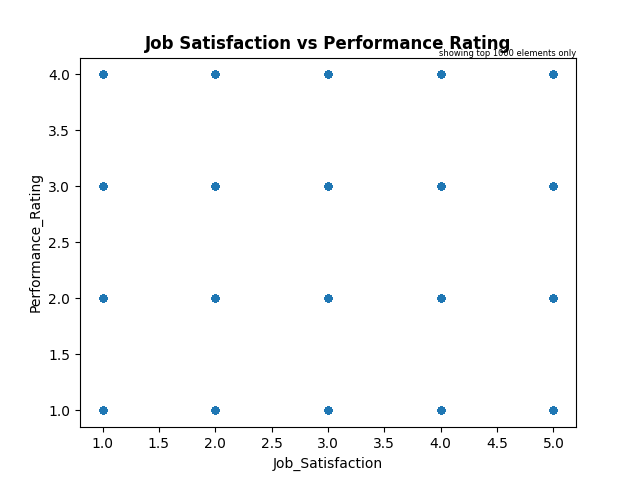

In [27]:
# Plot Job Satisfaction and Performance Rating

plt.clf()
plt.figure(figsize=(10,6))
df.plot.scatter(x='Job_Satisfaction', y='Performance_Rating')
plt.title('Job Satisfaction vs Performance Rating', fontweight='semibold')
%matplot plt

### Interpretation:
- `Job Satisfaction vs Performance Rating`: Shows no relationship at all, with data points scattered all around the chart, indicating inexistence of linearity.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

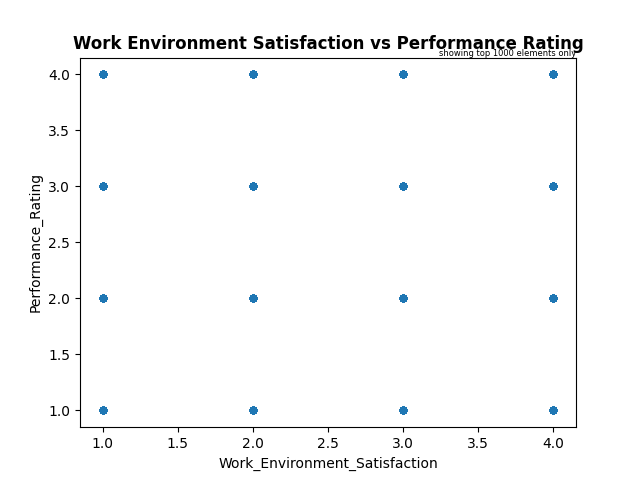

In [28]:
# Plot Work Environment Satisfaction and Performance Rating

plt.clf()
plt.figure(figsize=(10,6))
df.plot.scatter(x='Work_Environment_Satisfaction', y='Performance_Rating')
plt.title('Work Environment Satisfaction vs Performance Rating', fontweight='semibold')
%matplot plt

### Interpretation:
- `Work Environment Satisfaction vs Performance Rating `: Shows no relationship at all, with data points being spread all over the chart, displaying no linearity.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

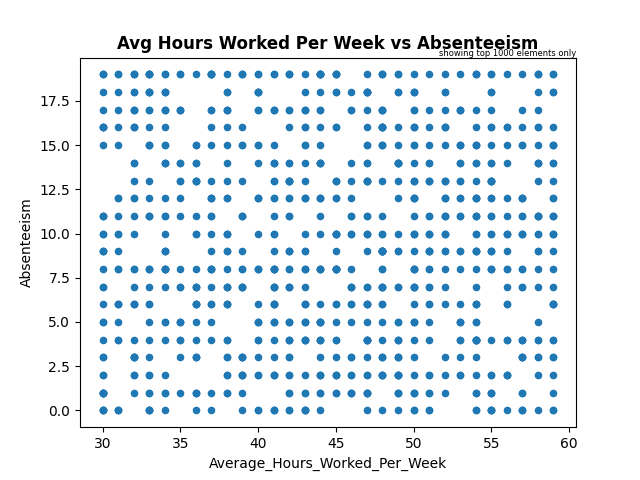

In [29]:
# Plot Avg Hours Worked per Week and Absenteeism

plt.clf()
plt.figure(figsize=(10,6))
df.plot.scatter(x='Average_Hours_Worked_Per_Week', y='Absenteeism')
plt.title('Avg Hours Worked Per Week vs Absenteeism', fontweight='semibold')
%matplot plt

### Interpretation:
- `Avg Hours Worked Per Week vs Absenteeism`: Plot shows no relationship at all, with data points being spread out all over the chart axes, which again shows no linearity.

## Handling Outliers
- We'll utilize **Box Plots** and **refer to the Histograms above** to assess outliers.

In [30]:
# Convert the Spark DataFrame to Pandas first
box_plot_df = df.to_pandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt/yarn/usercache/livy/appcache/application_1746678343741_0003/container_1746678343741_0003_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

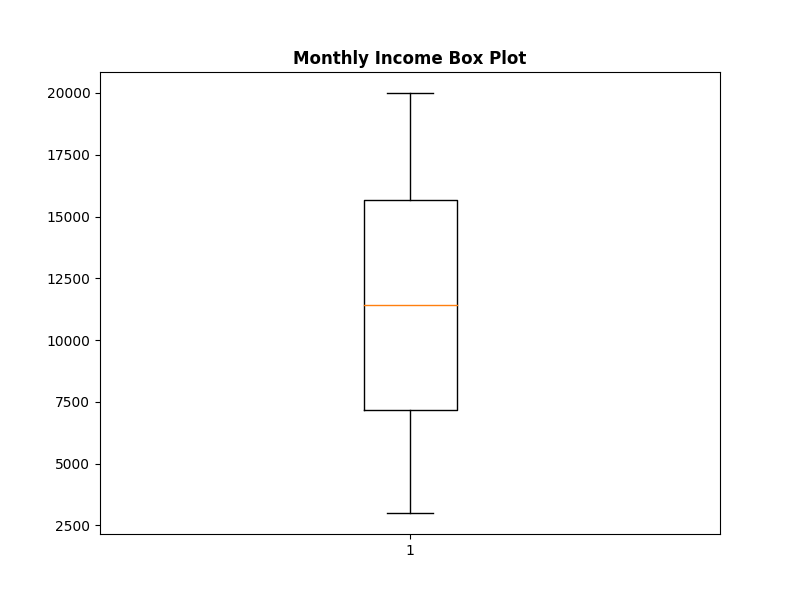

In [31]:
# Use box plot
plt.clf()
plt.figure(figsize=(8,6))
plt.boxplot(data=box_plot_df, x='Monthly_Income' )
plt.title('Monthly Income Box Plot', fontweight='semibold')
%matplot plt

### Interpretation:
- `Monthly Income Box Plot`: Shows no outliers in either end.
- For this analysis, there's no need for handling outliers based on Monthly Income because there are none.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

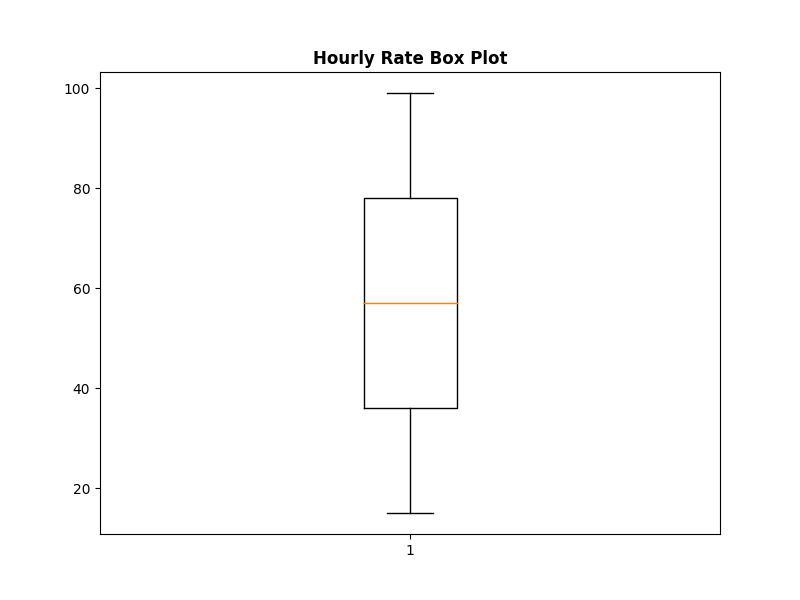

In [32]:
plt.clf()
plt.figure(figsize=(8,6))
plt.boxplot(data=box_plot_df, x='Hourly_Rate')
plt.title('Hourly Rate Box Plot', fontweight='semibold')
%matplot plt

### Interpretation:
- `Hourly Rate Box Plot`: Shows no outliers in either end.
- For this analysis, there's no need for handling outliers based on Hourly Rate because there are none.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

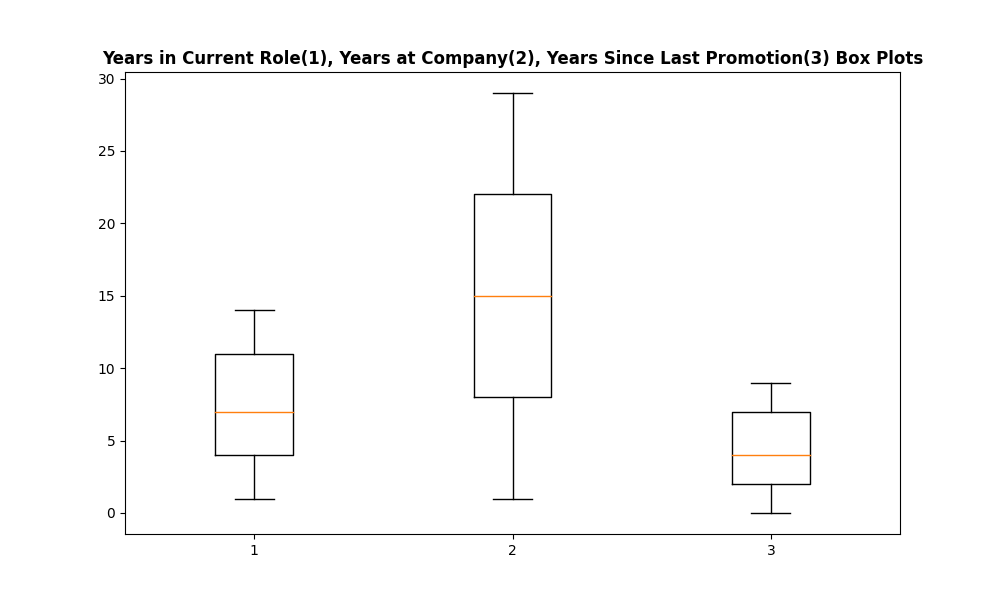

In [33]:
plt.clf()
plt.figure(figsize=(10,6))
plt.boxplot(box_plot_df[['Years_in_Current_Role', 'Years_at_Company','Years_Since_Last_Promotion']])
plt.title('Years in Current Role(1), Years at Company(2), Years Since Last Promotion(3) Box Plots', fontweight='semibold')
%matplot plt

### Interpretation:
- `Years in Current Role(1), Years at Company(2), Years Since Last Promotion(3) Box Plots`: Shows no outliers on all three features.
- For this analysis, there's no need for handling outliers based on these features because there are none.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

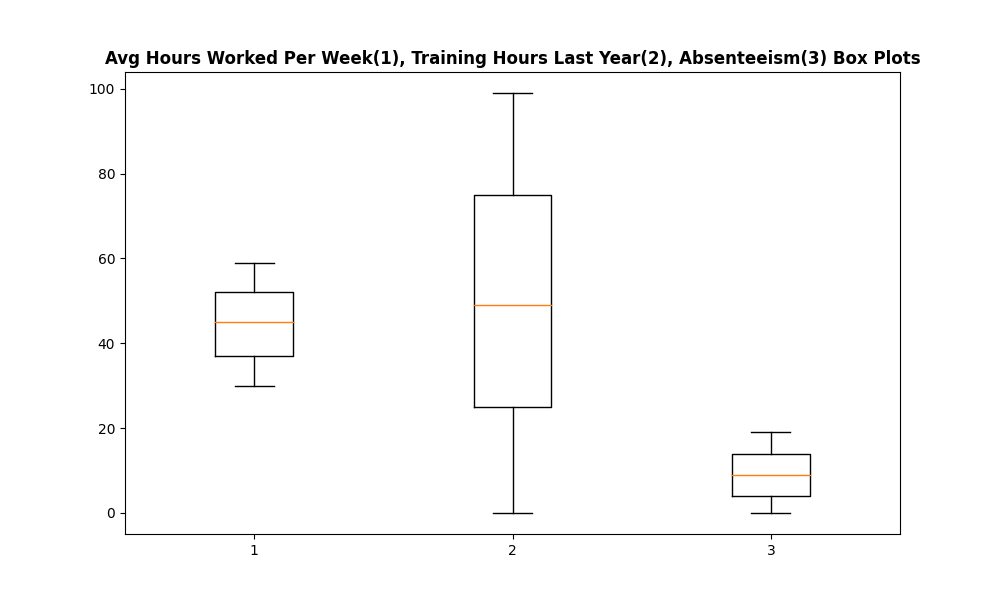

In [34]:
plt.clf()
plt.figure(figsize=(10,6))
plt.boxplot(box_plot_df[['Average_Hours_Worked_Per_Week','Training_Hours_Last_Year','Absenteeism']] )
plt.title('Avg Hours Worked Per Week(1), Training Hours Last Year(2), Absenteeism(3) Box Plots', fontweight='semibold')
%matplot plt

### Interpretation:
- `Avg Hours Worked Per Week(1), Training Hours Last Year(2), Absenteeism(3) Box Plots`: Shows no outliers on all three features.
- For this analysis, there's no need for handling outliers based on these features because there are none.

## Outlier Analysis Decision:
- Based on the box plots above, there are **NO OUTLIERS** in all the seemingly important features in the dataset, considering the topic of the project.
- The histograms plotted above also displays **NO SIGNIFICANT SKEWNESS** in all the features plotted, they are all roughly uniform and evenly distributed in the features with distinct levels or categories, and no clear dominance in frequencies.
- Considering the insights gained from this analysis, there's no need for handling outliers because there is none, and we previously determined that there are no missing values, so **all of the data will be retained and utilized**.

# Modelling

## Correlations and Interpretations

In [35]:
# extract numerical features

num_df = df.select_dtypes(include='int32')


# remove Employee_ID

num_df = num_df.drop(columns=['Employee_ID'])


num_df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            10000 non-null  int32
 1   Job_Level                      10000 non-null  int32
 2   Monthly_Income                 10000 non-null  int32
 3   Hourly_Rate                    10000 non-null  int32
 4   Years_at_Company               10000 non-null  int32
 5   Years_in_Current_Role          10000 non-null  int32
 6   Years_Since_Last_Promotion     10000 non-null  int32
 7   Work_Life_Balance              10000 non-null  int32
 8   Job_Satisfaction               10000 non-null  int32
 9   Performance_Rating             10000 non-null  int32
 10  Training_Hours_Last_Year       10000 non-null  int32
 11  Project_Count                  10000 non-null  int32
 12  Average_Hours_Worked_Per_Week  10000 non-null  int32
 13  Absenteeism   

In [36]:
# calculate correlations using .corr()

corr_matrix = num_df.corr()

corr_matrix

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                    Age  Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  Job_Satisfaction  Performance_Rating  Training_Hours_Last_Year  Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  Work_Environment_Satisfaction  Relationship_with_Manager  Job_Involvement  Distance_From_Home  Number_of_Companies_Worked
Age                            1.000000  -0.001506       -0.003342     0.021090         -0.011907               0.007994                   -0.004264          -0.004611         -0.005002           -0.015472                 -0.009603      -0.014160                       0.021421     0.008563                       0.016651                  -0.001305         0.004660            0.001794                    0.011120
Job_Level                     -0.001506   1.000000       -0.004245    -0.009402          0.003171              -0.004761                    0.002781          -0.034403     

In [37]:
# Save correlations to CSV file for better view

#corr_matrix.to_csv('s3://spark-bucket-adamchua/studio/project_correlation_output/')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Correlation Data in CSV format

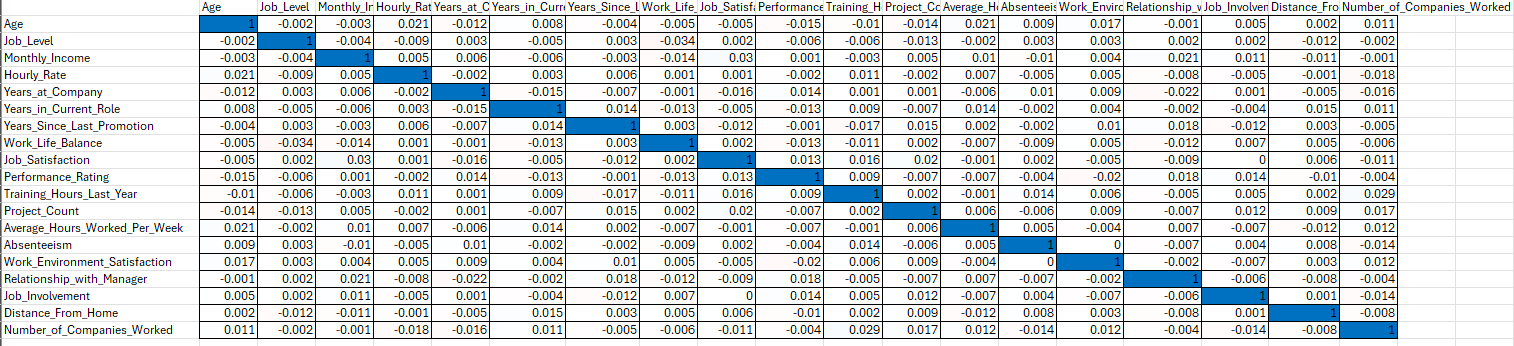



### Observations:
- There are no significant correlations or relationships, positive or negative, between any variable based on this correlation matrix. **Most variables have very weak correlations, indicating little to no linear relationship among them. This might suggest independence between many HR-related attributes in this dataset**.

#### Some Notable Patterns (but still Very Weak):
- `Age vs. Hourly Rate (0.021)`: Slight positive correlation; older employees may earn marginally higher hourly wages, but the relationship is negligible.
- `Age vs. Years in Current Role (0.008) and Age vs. Years at Company (-0.012)`: No meaningful correlation, indicating tenure and age don't necessarily influence each other in this dataset.

- `Job Level vs. Work-Life Balance (-0.034)`: A slightly negative trend suggests that higher job levels might correlate with slightly lower perceptions or degrees of work-life balance.

- `Monthly Income vs. Job Satisfaction (0.030)`: A very small positive correlation; possibly indicating that slightly higher income might be associated with better job satisfaction, but again very weak.

- `Years at Company vs. Performance Rating (0.014)`: Small positive correlation; longer tenured employees may have slightly better performance ratings.

- `Training Hours Last Year vs. Hourly Rate (0.011)`: Slight positive relationship; potentially implying that higher-paid employees receive slightly more training.

- `Monthly Income vs. Average Hours Worked per Week (0.010)`: Small positive correlation; higher earners might be working slightly more hours.

- `Monthly Income vs. Relationship with Manager (0.021)`: Slightly positive; people with higher incomes might rate their managers a bit better.

- `Hourly Rate vs. Number of Companies Worked (-0.018)`: Slight negative trend; higher-paid employees may have had fewer past employers, suggesting loyalty or selectiveness.

#### Almost No Relationship At All Based On This Dataset
- Features like `Job Involvement, Distance From Home, Absenteeism, and Work Environment Satisfaction` have near-zero correlations with most other attributes.

- Suggests these variables operate independently in this dataset or might be influenced by factors not included in the dataset.

## Feature Engineering & Data Transformations

In [38]:
# create a separate copy for model df

model_df = df.copy()

model_df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    10000 non-null  int32 
 1   Age                            10000 non-null  int32 
 2   Gender                         10000 non-null  object
 3   Marital_Status                 10000 non-null  object
 4   Department                     10000 non-null  object
 5   Job_Role                       10000 non-null  object
 6   Job_Level                      10000 non-null  int32 
 7   Monthly_Income                 10000 non-null  int32 
 8   Hourly_Rate                    10000 non-null  int32 
 9   Years_at_Company               10000 non-null  int32 
 10  Years_in_Current_Role          10000 non-null  int32 
 11  Years_Since_Last_Promotion     10000 non-null  int32 
 12  Work_Life_Balance              10000 non-null  int32 
 13 

### Convert Target Feature Labels to 0 and 1

In [39]:
# Map and convert target feature's 'Yes/No' values to binary 1/0

model_df['Attrition'] = model_df['Attrition'].map({'No':0, 'Yes':1})


# Convert to int32 so it permanently remains an integer not a string object

model_df['Attrition'] = model_df['Attrition'].astype('int32')


model_df['Attrition'].value_counts()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0    8003
1    1997
Name: Attrition, dtype: int64

### Create Dummies for Categorical Values

In [40]:
# Extract categorical feature names

cat_features = model_df.select_dtypes(include='object').columns

cat_features

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Index(['Gender', 'Marital_Status', 'Department', 'Job_Role', 'Overtime'], dtype='object')

In [41]:
# use .get_dummies() function
# set drop_first to true for dummies, which is n-1
# this is to avoid multicollinearity
# since we'll be using Logistic Regression, which is sensitive to multicollinearity issues

model_df = ps.get_dummies(model_df, columns=cat_features, drop_first=True)

model_df.head()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

   Employee_ID  Age  Job_Level  Monthly_Income  Hourly_Rate  Years_at_Company  Years_in_Current_Role  Years_Since_Last_Promotion  Work_Life_Balance  Job_Satisfaction  Performance_Rating  Training_Hours_Last_Year  Project_Count  Average_Hours_Worked_Per_Week  Absenteeism  Work_Environment_Satisfaction  Relationship_with_Manager  Job_Involvement  Distance_From_Home  Number_of_Companies_Worked  Attrition  Gender_Male  Marital_Status_Married  Marital_Status_Single  Department_HR  Department_IT  Department_Marketing  Department_Sales  Job_Role_Assistant  Job_Role_Executive  Job_Role_Manager  Overtime_Yes
0            1   58          5            7332           81                24                     12                           3                  1                 3                   2                        74              9                             48           16                              4                          1                1                  49                           3

In [42]:
# Remove Employee_ID column

model_df = model_df.drop('Employee_ID', axis=1)

model_df.info()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            10000 non-null  int32
 1   Job_Level                      10000 non-null  int32
 2   Monthly_Income                 10000 non-null  int32
 3   Hourly_Rate                    10000 non-null  int32
 4   Years_at_Company               10000 non-null  int32
 5   Years_in_Current_Role          10000 non-null  int32
 6   Years_Since_Last_Promotion     10000 non-null  int32
 7   Work_Life_Balance              10000 non-null  int32
 8   Job_Satisfaction               10000 non-null  int32
 9   Performance_Rating             10000 non-null  int32
 10  Training_Hours_Last_Year       10000 non-null  int32
 11  Project_Count                  10000 non-null  int32
 12  Average_Hours_Worked_Per_Week  10000 non-null  int32
 13  Absenteeism   

### Import PySpark  ML Libraries

In [43]:
# import pyspark libraries for ML

import pyspark.ml.feature as feat
from pyspark.ml import Pipeline
import pyspark.ml.classification as cl
import pyspark.ml.clustering as clust
import pyspark.ml.tuning as tune
import pyspark.ml.evaluation as ev

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Classification Models

- Setting seed values to `101` for reproducibility

### Logistic Regression Model Using Grid Search for Regularization Parameters

In [44]:
# Split into train and test sets with a 70/30 ratio
model_train, model_test = (
    model_df.to_spark()
    .randomSplit([0.7, 0.3], seed=101)
)

# Convert all features to vector except for Target feature
vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in model_df.columns if x != 'Attrition']
    , outputCol='features'
)

# Create binomial logistic regression model
logReg_obj = cl.LogisticRegression(
    labelCol='Attrition'
    , featuresCol='features'
)


# Use ParamGridBuilder to build a grid of parameters
logReg_grid = (
    tune.ParamGridBuilder()
    # try 5 values for regParam
    .addGrid(logReg_obj.regParam
            , [0.0, 0.01, 0.1, 1, 10]
        )
    # try 5 values for elasticNetParam
    .addGrid(logReg_obj.elasticNetParam
            , [0.0, 0.25, 0.5, 0.75, 1.0]
        )
    .build()
)

# Create evaluator
logReg_ev = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
        , labelCol='Attrition')





# Use K-fold cross validation for grid search
# CrossValidator binds all of these together
# Set k number of folds to 5, because it's a good balance (not too few or too many)
cross_v = tune.CrossValidator(
    estimator=logReg_obj
    , estimatorParamMaps=logReg_grid
    , evaluator=logReg_ev
    , numFolds=5
    , seed=101
)


# Create pipelines
pipeline = Pipeline(stages=[vectorAssembler])
data_trans = pipeline.fit(model_train)


# Fit model with training set
logReg_modelTest = cross_v.fit(
    data_trans.transform(model_train)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt/yarn/usercache/livy/appcache/application_1746678343741_0003/container_1746678343741_0003_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

### View Best Logistic Regression Model

In [45]:
# Display the best performing parameters

print('Best params - regParam: {}, elasticNetParam: {}'.format(
    logReg_modelTest.bestModel._java_obj.getRegParam(),
      logReg_modelTest.bestModel._java_obj.getElasticNetParam()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Best params - regParam: 0.0, elasticNetParam: 0.0

Exception in thread cell_monitor-45:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in cell_monitor
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in <listcomp>
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
KeyError: 'jobGroup'



In [46]:
# Get tuning results

tuning_results = pd.DataFrame([list(x.values()) for x in logReg_grid], columns=['regParam', 'elasticNetParam'])
tuning_results['F-1'] = logReg_modelTest.avgMetrics
tuning_results.sort_values('F-1', ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    regParam  elasticNetParam       F-1
0       0.00             0.00  0.709424
13      0.10             0.75  0.709424
23     10.00             0.75  0.709424
22     10.00             0.50  0.709424
21     10.00             0.25  0.709424
20     10.00             0.00  0.709424
19      1.00             1.00  0.709424
18      1.00             0.75  0.709424
17      1.00             0.50  0.709424
16      1.00             0.25  0.709424
15      1.00             0.00  0.709424
14      0.10             1.00  0.709424
12      0.10             0.50  0.709424
1       0.00             0.25  0.709424
11      0.10             0.25  0.709424
10      0.10             0.00  0.709424
9       0.01             1.00  0.709424
8       0.01             0.75  0.709424
7       0.01             0.50  0.709424
6       0.01             0.25  0.709424
5       0.01             0.00  0.709424
4       0.00             1.00  0.709424
3       0.00             0.75  0.709424
2       0.00             0.50  0.709424


Exception in thread cell_monitor-46:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in cell_monitor
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in <listcomp>
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
KeyError: 'jobGroup'



### View Logisitc Regression Model Training History Summary

In [47]:
# Get training summary data
trainingSummary = logReg_modelTest.bestModel.summary


# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

print('\n')    
    
# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("\nTrue positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("\nPrecision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("\nRecall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("\nF-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))
    
accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("\n\nAccuracy: %s\n\nFPR: %s\n\nTPR: %s\n\nF-measure: %s\n\nPrecision: %s\n\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

VBox()

Exception in thread cell_monitor-47:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in cell_monitor
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in <listcomp>
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
KeyError: 'jobGroup'



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

objectiveHistory:
0.502191109840774
0.4999981418601011
0.49991372137903284
0.4998908042471601
0.4998758852822639
0.49987403827657345
0.4998738283945974
0.49987381325757857
0.49987381107472295
0.4998738105313353
0.49987381047586205
0.4998738104674474


False positive rate by label:
label 0: 1.0
label 1: 0.0

True positive rate by label:
label 0: 1.0
label 1: 0.0

Precision by label:
label 0: 0.798705966930266
label 1: 0.0

Recall by label:
label 0: 1.0
label 1: 0.0

F-measure by label:
label 0: 0.888089528377298
label 1: 0.0


Accuracy: 0.798705966930266

FPR: 0.798705966930266

TPR: 0.798705966930266

F-measure: 0.7093224054832338

Precision: 0.6379312216100111

Recall: 0.798705966930266

### Evaluate Performance of Best Logistic Regression Model with Test Set

In [48]:
# Measure performance

data_trans_test = data_trans.transform(model_test)
results = logReg_modelTest.transform(data_trans_test)


print('Accuracy: ', logReg_ev.evaluate(results, {logReg_ev.metricName: 'accuracy'}))
print('Recall: ', logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedRecall'}))
print('Precision: ', logReg_ev.evaluate(results, {logReg_ev.metricName: 'weightedPrecision'}))
print('F-1 Score: ', logReg_ev.evaluate(results, {logReg_ev.metricName: 'f1'}))

VBox()

Exception in thread cell_monitor-48:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in cell_monitor
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in <listcomp>
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
KeyError: 'jobGroup'



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy:  0.8039408866995074
Recall:  0.8039408866995074
Precision:  0.6463209493071902
F-1 Score:  0.7165655527545581

### View Model Coefficients

In [49]:
# Get feature names
selected_cols = ([x['name'] for x in data_trans_test.schema['features'].metadata['ml_attr']['attrs']['numeric']])


# Get binomial model coefficients
lgr_coeffs = pd.DataFrame([logReg_modelTest.bestModel.coefficients.toArray()], columns=selected_cols).T

# Sort coefficient values
lgr_coeffs = lgr_coeffs.sort_values(by=0, ascending=False)


print(lgr_coeffs)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                                      0
Job_Role_Assistant             0.069856
Overtime_Yes                   0.046593
Gender_Male                    0.044543
Job_Role_Executive             0.040856
Job_Level                      0.038643
Work_Life_Balance              0.038116
Job_Involvement                0.030959
Performance_Rating             0.027656
Years_in_Current_Role          0.005642
Age                            0.004332
Distance_From_Home             0.003379
Project_Count                  0.002624
Job_Satisfaction               0.002581
Average_Hours_Worked_Per_Week  0.001976
Training_Hours_Last_Year       0.000988
Years_at_Company               0.000722
Monthly_Income                 0.000004
Hourly_Rate                   -0.000894
Absenteeism                   -0.002167
Relationship_with_Manager     -0.003798
Marital_Status_Single         -0.008097
Years_Since_Last_Promotion    -0.008257
Department_Sales              -0.012105
Number_of_Companies_Worked    -0.027331


Exception in thread cell_monitor-49:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in cell_monitor
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in <listcomp>
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
KeyError: 'jobGroup'



### Interpretation of Performance Metrics:

**`Accuracy (0.8039):`**
- The model correctly predicts outcomes about 80% of the time, indicating solid overall performance. **This is generally considered good, but it can be misleading if the data is imbalanced.** 
- The model correctly predicts whether an employee will leave or stay about 80% of the time, suggesting overall solid performance. However, accuracy alone can be misleading if attrition cases are much less frequent than non-attrition cases.

**`Recall (0.8039):`**
- It captures over 80% of actual positive cases, making it strong at identifying positives and minimizing false negatives.
- The model successfully identifies about 80% of employees who actually left. This high recall is valuable in an attrition context—it means the company can proactively flag most at-risk employees before they leave.

**`Precision (0.6463)`**
- However, with a precision of around 64.6%, a notable portion of the predicted positives are incorrect. Around 35% of predicted positives are actually false, highlighting a relatively high false positive rate.
- Of all the employees the model predicted would leave, only about 64.6% actually did. This indicates a moderate number of false alarms, i.e., employees flagged as likely to leave but who actually stay. This may lead to unnecessary retention interventions or resource use.

**`F1 Score (0.7166)`**
- Reflects a moderately good model with a balanced performance between precision and recall; a decent balance between identifying most positive cases (Recall) and making accurate positive predictions (Precision), but there's still a trade-off; false positives are relatively common.
- The F1 score reflects a reasonable balance between recall and precision. In this case, it means the model is fairly effective at both identifying actual attrition and keeping false positives a bit under control.

-------------------------------------------------------------------------------------------------------------------------------

### Random Forest Classifier Using Grid Search

In [50]:
# Convert all features to vectors except for Target feature
vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in model_df.columns if x != 'Attrition']
    , outputCol='features'
)

# Create Random Forest Classifier
rf_obj = cl.RandomForestClassifier(
    labelCol='Attrition'
    , featuresCol='features'
    , minInstancesPerNode=1
    , numTrees=10
)


# Use ParamGridBuilder to build a grid of parameters
rf_grid = (
    tune.ParamGridBuilder()    
    #try 4 values for minInstancesPerNode
    .addGrid(rf_obj.minInstancesPerNode
            , [1, 5, 10, 20]
        )
    #try 4 values for maxDepth
    .addGrid(rf_obj.maxDepth
            , [5, 10, 15, 20]
        )
    .build()
)

# Create Evaluator
rf_ev = ev.MulticlassClassificationEvaluator(
    predictionCol='prediction'
    , labelCol='Attrition')





# Use K-fold cross validation for grid search
# CrossValidator binds all of these together
# Set k number of folds to 5
cross_v = tune.CrossValidator(
    estimator=rf_obj
    , estimatorParamMaps=rf_grid
    , evaluator=rf_ev
    , numFolds=5
    , seed=101
)

# Create pipelines
pipeline = Pipeline(stages=[vectorAssembler])
data_trans = pipeline.fit(model_train)


# Evaluate model with test set
rf_modelTest = cross_v.fit(
    data_trans.transform(model_train)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-50:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in cell_monitor
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 154, in <listcomp>
    job_group_filtered_jobs = [job for job in jobs_data if job['jobGroup'] == str(statement_id)]
KeyError: 'jobGroup'

Exception in thread cell_monitor-44:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _boots

### View Best Random Forest Classifier Model

In [51]:
# Display best performing hyperparameters
print('Best params - MaxDepth: {}, MinInstancesPerNode: {}'.format(
    rf_modelTest.bestModel._java_obj.getMaxDepth(),
      rf_modelTest.bestModel._java_obj.getMinInstancesPerNode()))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Best params - MaxDepth: 15, MinInstancesPerNode: 1

In [52]:
# Get tuning results
tuning_results = pd.DataFrame([list(x.values()) for x in rf_grid], columns=['minInstancesPerNode', 'maxDepth'])
tuning_results['F-1'] = rf_modelTest.avgMetrics
tuning_results.sort_values('F-1', ascending=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

    minInstancesPerNode  maxDepth       F-1
2                     1        15  0.712886
3                     1        20  0.711308
7                     5        20  0.710087
5                     5        10  0.709616
0                     1         5  0.709424
4                     5         5  0.709424
8                    10         5  0.709424
12                   20         5  0.709424
13                   20        10  0.709424
14                   20        15  0.709424
15                   20        20  0.709424
9                    10        10  0.709354
6                     5        15  0.709225
1                     1        10  0.709210
10                   10        15  0.709074
11                   10        20  0.709004

### View Best Random Forest Classifier Model Training History Summary

In [53]:
# Get training summary data
trainingSummary = rf_modelTest.bestModel.summary
  
    
# for multiclass, we can inspect metrics on a per-label basis
print("\nFalse positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("\nTrue positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("\nPrecision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("\nRecall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("\nF-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))
    
accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("\n\nAccuracy: %s\n\nFPR: %s\n\nTPR: %s\n\nF-measure: %s\n\nPrecision: %s\n\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…


False positive rate by label:
label 0: 0.215
label 1: 0.0

True positive rate by label:
label 0: 1.0
label 1: 0.785

Precision by label:
label 0: 0.9485997267759563
label 1: 1.0

Recall by label:
label 0: 1.0
label 1: 0.785

F-measure by label:
label 0: 0.973621943738498
label 1: 0.8795518207282913


Accuracy: 0.9567217828900072

FPR: 0.1717217828900072

TPR: 0.9567217828900072

F-measure: 0.9546861892864076

Precision: 0.9589462950741102

Recall: 0.9567217828900072

### Evaluate Best Random Forest Classifier Model

In [54]:
# Measure performance
data_trans_test = data_trans.transform(model_test)
results = rf_modelTest.transform(data_trans_test)


print('Accuracy: ', rf_ev.evaluate(results, {rf_ev.metricName: 'accuracy'}))
print('Recall: ', rf_ev.evaluate(results, {rf_ev.metricName: 'weightedRecall'}))
print('Precision: ', rf_ev.evaluate(results, {rf_ev.metricName: 'weightedPrecision'}))
print('F-1 Score: ', rf_ev.evaluate(results, {rf_ev.metricName: 'f1'}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Accuracy:  0.787192118226601
Recall:  0.787192118226601
Precision:  0.687141158484797
F-1 Score:  0.7178939541436544

### Interpretation of Performance Metrics:

**`Accuracy: 0.787`**
- In this case, the model correctly classified 78.7% of the test set, which is decent in overall classification. While accuracy can be a useful metric, **it may not always provide a meaningful result, especially with imbalanced classes in datasets (e.g., if most employees don't attrite/leave, accuracy could be high just by predicting the majority class correctly).**

**`Recall: 0.787`**
- Recall score indicates that about 79% of all actual positive cases are correctly identified. This suggests the model is good at detecting positive cases, but it may miss some positive instances.
- For this analysis, the model correctly identifies 79% of employees who will attrite/leave. This suggests that the model is good at catching most employees who are likely to leave, which could be crucial in identifying at-risk employees early for retention efforts.

**`Precision: 0.687`:**
- Precision score means that approximately 69% of the predicted positive instances are correct. This is relatively decent, though there’s room for improvement.
- Reflects that about 69% of employees predicted to leave will actually do it. This is decent, but it could be better, especially if the goal is to avoid falsely flagging employees who are not likely to leave.

**`F-1 Score: 0.718`:**
- F1-Score suggests a good balance between Precision and Recall. Indicates the model is effective in handling both precision and recall.
- In this case, the model indicates that it achieves a good balance between detecting employees who will attrite (positive cases) and minimizing mistakes. In the context of employee attrition, a value above 0.7 suggests the model is effective in identifying both attrited and non-attrited employees.



-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

## Clustering Model Using K-Means (Additional)
- Setting seed value to `101` for reproducibility

### Test and Evaluate Multiple K-Means Models to Get Optimal k-value
- Calculate the Silhouette score for each for comparison
- Silhouette score ranges from −1 to +1
- **Anything around 0.5 or more indicates well separated clusters**

In [55]:
# Vectorize independent features except for target column
vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in model_df.columns if x != 'Attrition'],
    outputCol='features'
)

# Normalize data using standard scaling
norm = feat.StandardScaler(
    inputCol='features',
    outputCol='standardized',
    withMean=True,
    withStd=True
)

# Initialize evaluator
clust_ev = ev.ClusteringEvaluator(
    featuresCol='standardized',
    distanceMeasure='squaredEuclidean'
)

# Test multiple values of k from 2 to 11
# Create empty list to store silhoutte scores
silhouette_scores = []
k_values = list(range(2, 11))


# for loop to test multiple k-means models with k values
for k in k_values:
    kmeans = clust.KMeans(
        k=k,
        seed=101,
        featuresCol='standardized',
        distanceMeasure='euclidean'
    )
    
    # Implement model pipelines
    pipeline = Pipeline(stages=[vectorAssembler, norm, kmeans])
    model = pipeline.fit(model_df.to_spark())
    clustered = model.transform(model_df.to_spark())
    
    # Evaluate each iteration of K-Means models
    score = clust_ev.evaluate(clustered)
    
    # Add silhoutte score of K-Means model iteration in score list
    silhouette_scores.append(score)
    
    # View Clustering Results
    print(f"k={k}, Silhouette Score = {score}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-55:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 4384



k=2, Silhouette Score = 0.06879828358032535
k=3, Silhouette Score = 0.11078849689816236
k=4, Silhouette Score = 0.13199498769792084
k=5, Silhouette Score = 0.1039117751683001
k=6, Silhouette Score = 0.08685873876252104
k=7, Silhouette Score = 0.08028403913217058
k=8, Silhouette Score = 0.06573237867724167
k=9, Silhouette Score = 0.08846698047000812
k=10, Silhouette Score = 0.08240989892143054
/mnt/yarn/usercache/livy/appcache/application_1746678343741_0003/container_1746678343741_0003_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

### Set `k=4` for K-Means Model (`k` with Best Silhoutte Score Based on Previous Testing)

In [56]:
# Convert all features to vector except for Target feature
vectorAssembler = feat.VectorAssembler(
    inputCols=[x for x in model_df.columns if x != 'Attrition']
    , outputCol='features')


# Normalize vectors using standard scaling
norm = feat.StandardScaler(
    inputCol=vectorAssembler.getOutputCol()
    , outputCol='standardized'
    , withMean=True
    , withStd=True
)

# Set k=4, the optimal value based on silhoutte score from testing
# Set distance measure to euclidean
# Set seed to 101 to reproduce same model performance from testing

distance_measure = 'euclidean'
kmeans_obj = clust.KMeans(k=4, 
                          seed=101, 
                          featuresCol=norm.getOutputCol(), 
                          distanceMeasure=distance_measure)

pip = Pipeline(stages=[vectorAssembler, norm, kmeans_obj])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### View Clustering Results

In [57]:
# Display results
clustering_results = (
    pip
    .fit(model_df.to_spark())
    .transform(model_df.to_spark())
    .pandas_api()
)

clustering_results[['Attrition', 'prediction']].head(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-57:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 4672



   Attrition  prediction
0          0           1
1          0           2
2          1           1
3          0           2
4          0           2
5          1           1
6          1           0
7          0           1
8          0           3
9          0           0

In [58]:
# Get Silhoutte score based on euclidean distance measure
# Displaying score again to verify the same score and reproduced the model performance

eval_distance_measure = 'squaredEuclidean' if distance_measure == 'euclidean' else distance_measure

clustering_ev = ev.ClusteringEvaluator(featuresCol=norm.getOutputCol(), distanceMeasure=eval_distance_measure)
clustering_ev.evaluate(clustering_results.to_spark())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.13199498769792084
/mnt/yarn/usercache/livy/appcache/application_1746678343741_0003/container_1746678343741_0003_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)

### Visualizing Clusters

In [59]:
# Get prediction counts for each cluster type
clustering_results.prediction.value_counts()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1    4123
0    2008
2    1953
3    1916
Name: prediction, dtype: int64

In [60]:
# Define function to create scatter plot
def cluster_scatter(df, x, y, color):
    plt.clf()
    ax = df.plot.scatter(x, y, c=color, colormap='viridis')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'Clustering {x} vs {y}');
    return ax

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [61]:
# Get all 4 clusters and results
clusters = clustering_results[clustering_results.prediction]
clusters.columns

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Index(['Age', 'Job_Level', 'Monthly_Income', 'Hourly_Rate', 'Years_at_Company',
       'Years_in_Current_Role', 'Years_Since_Last_Promotion',
       'Work_Life_Balance', 'Job_Satisfaction', 'Performance_Rating',
       'Training_Hours_Last_Year', 'Project_Count',
       'Average_Hours_Worked_Per_Week', 'Absenteeism',
       'Work_Environment_Satisfaction', 'Relationship_with_Manager',
       'Job_Involvement', 'Distance_From_Home', 'Number_of_Companies_Worked',
       'Attrition', 'Gender_Male', 'Marital_Status_Married',
       'Marital_Status_Single', 'Department_HR', 'Department_IT',
       'Department_Marketing', 'Department_Sales', 'Job_Role_Assistant',
       'Job_Role_Executive', 'Job_Role_Manager', 'Overtime_Yes', 'features',
       'standardized', 'prediction'],
      dtype='object')

### Clustering Based on Hourly Rate as 'Y' Variable

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

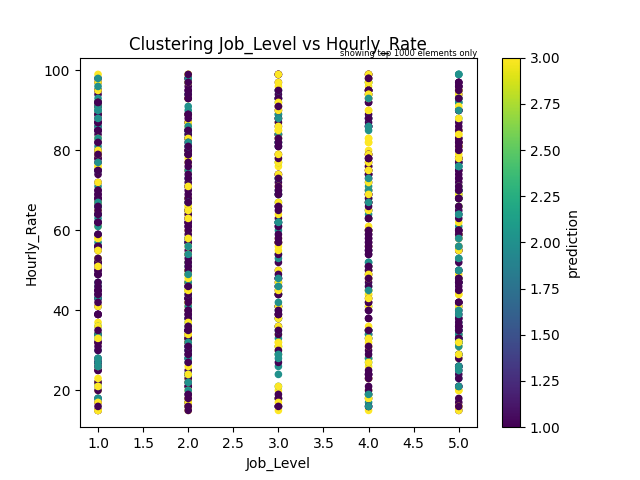

In [62]:
# Plot clusters
cluster_scatter(clusters, 'Job_Level', 'Hourly_Rate', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

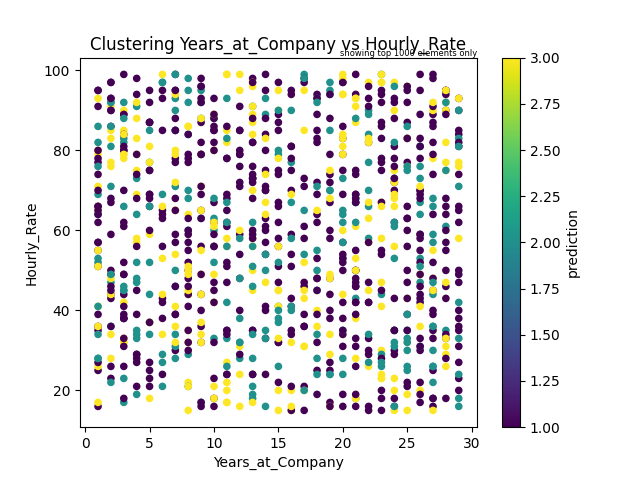

In [63]:
# Plot clusters
cluster_scatter(clusters, 'Years_at_Company', 'Hourly_Rate', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

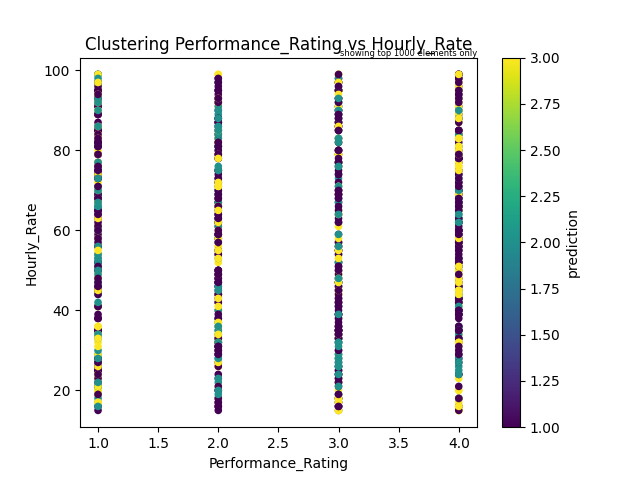

In [64]:
# Plot clusters
cluster_scatter(clusters, 'Performance_Rating', 'Hourly_Rate', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

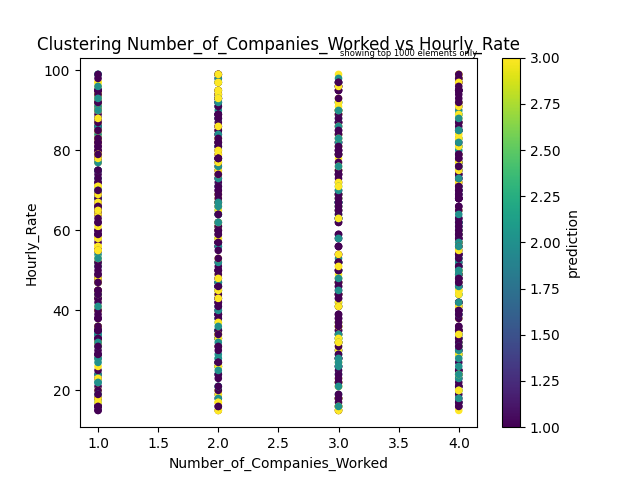

In [65]:
# Plot clusters
cluster_scatter(clusters, 'Number_of_Companies_Worked', 'Hourly_Rate', 'prediction')
%matplot plt

### Clustering Based on Monthly Income as 'Y' Variable

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

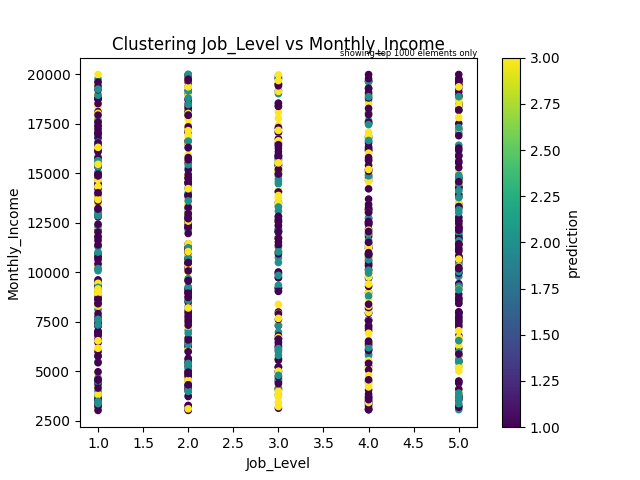

In [66]:
# Plot clusters
cluster_scatter(clusters, 'Job_Level', 'Monthly_Income', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

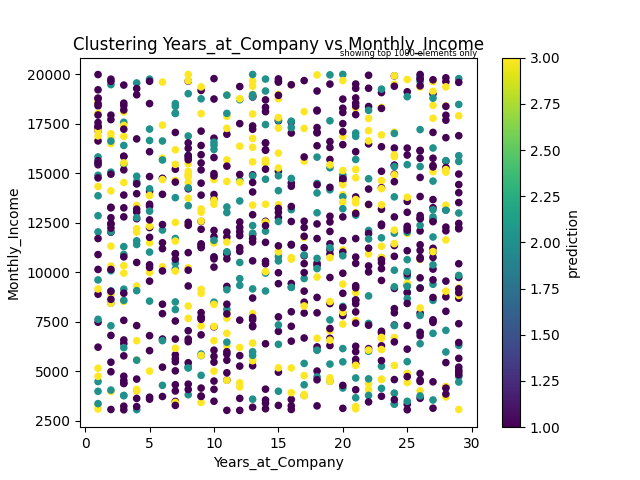

In [67]:
# Plot clusters
cluster_scatter(clusters, 'Years_at_Company', 'Monthly_Income', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

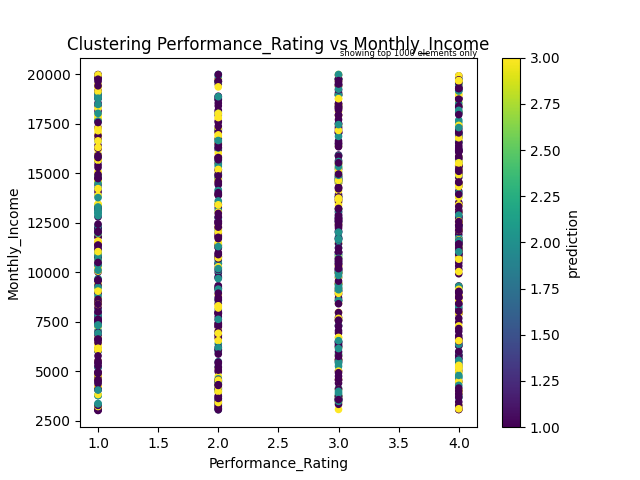

In [68]:
# Plot clusters
cluster_scatter(clusters, 'Performance_Rating', 'Monthly_Income', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

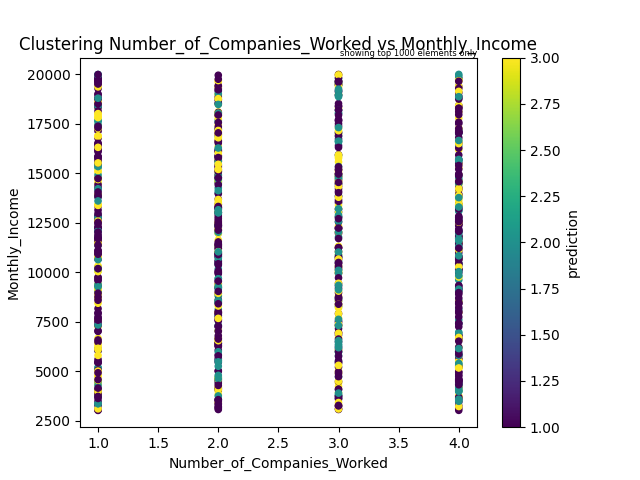

In [69]:
# Plot clusters
cluster_scatter(clusters, 'Number_of_Companies_Worked', 'Monthly_Income', 'prediction')
%matplot plt

### Clustering Based on Performance Rating as 'Y' Variable

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

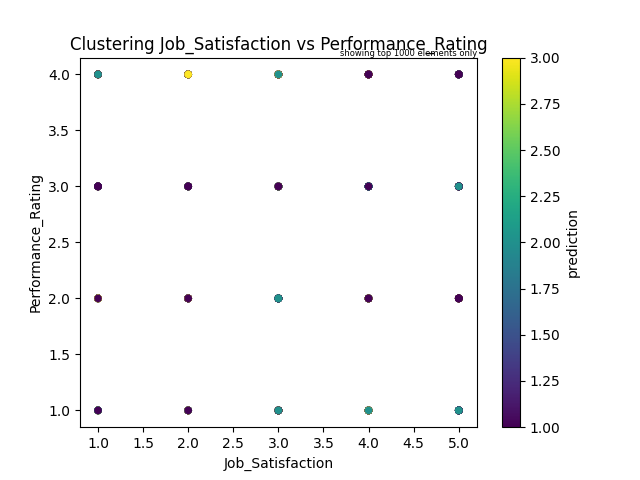

In [70]:
# Plot clusters
cluster_scatter(clusters, 'Job_Satisfaction', 'Performance_Rating', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

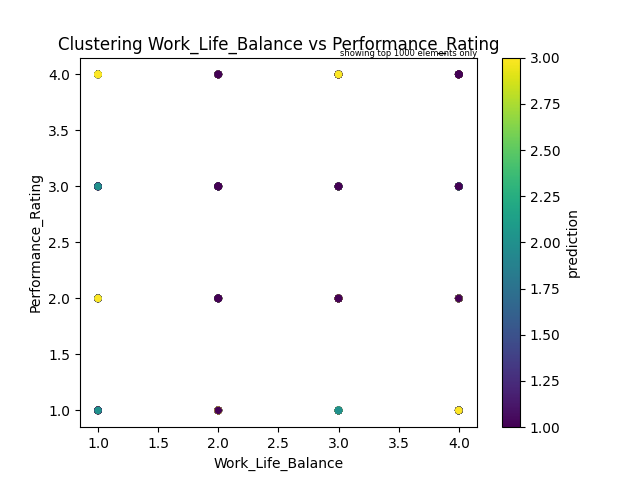

In [71]:
# Plot clusters
cluster_scatter(clusters, 'Work_Life_Balance','Performance_Rating', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

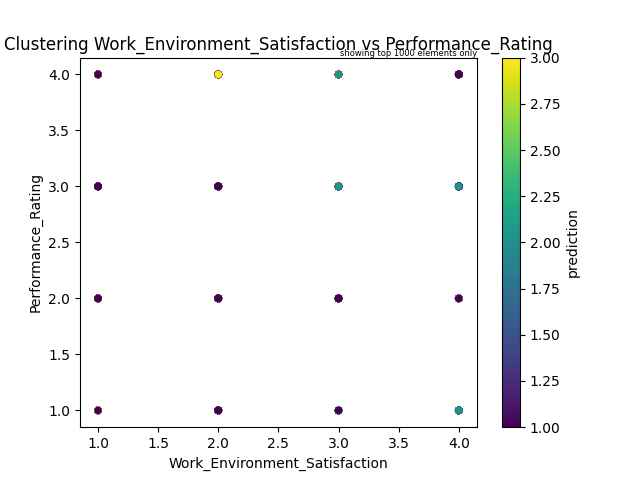

In [72]:
# Plot clusters
cluster_scatter(clusters, 'Work_Environment_Satisfaction','Performance_Rating', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

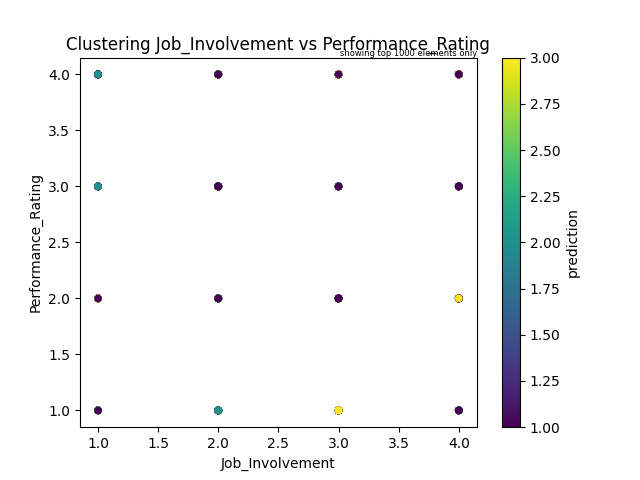

In [73]:
# Plot clusters
cluster_scatter(clusters, 'Job_Involvement','Performance_Rating', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

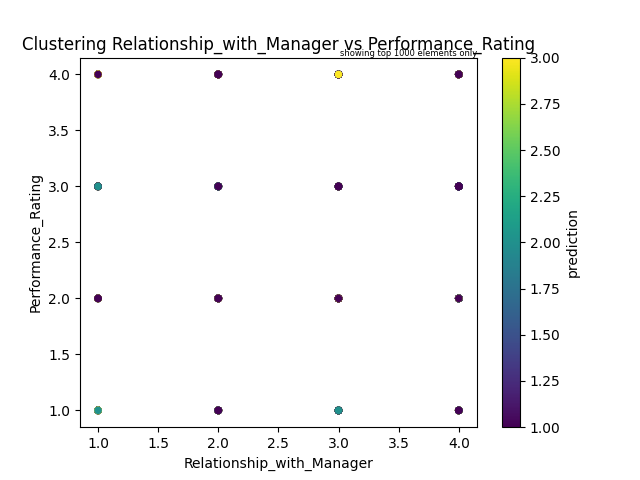

In [74]:
# Plot clusters
cluster_scatter(clusters, 'Relationship_with_Manager','Performance_Rating', 'prediction')
%matplot plt

### Clustering Based on Job Satisfaction as 'Y' Variable

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

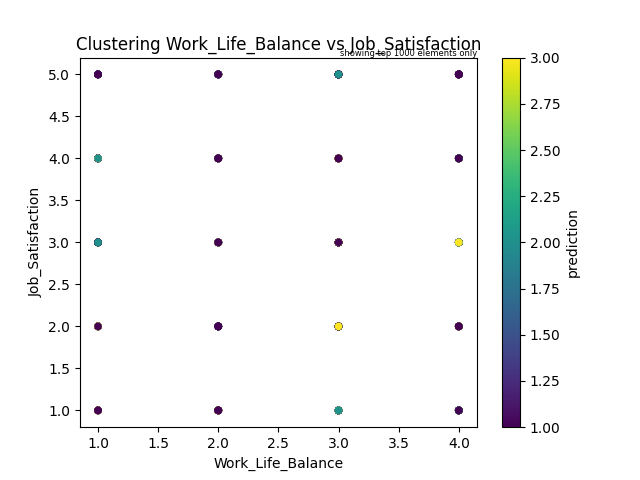

In [75]:
# Plot clusters
cluster_scatter(clusters, 'Work_Life_Balance','Job_Satisfaction', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

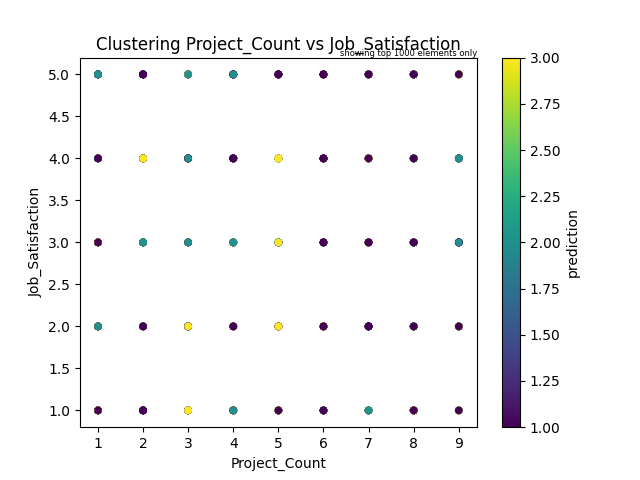

In [76]:
# Plot clusters
cluster_scatter(clusters, 'Project_Count','Job_Satisfaction', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

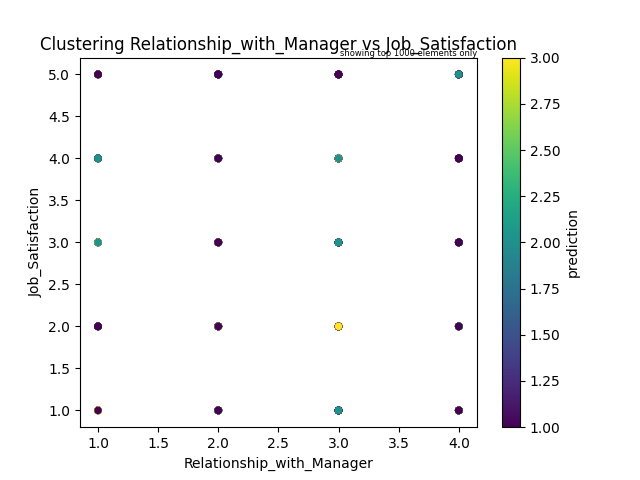

In [77]:
# Plot clusters
cluster_scatter(clusters, 'Relationship_with_Manager','Job_Satisfaction', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

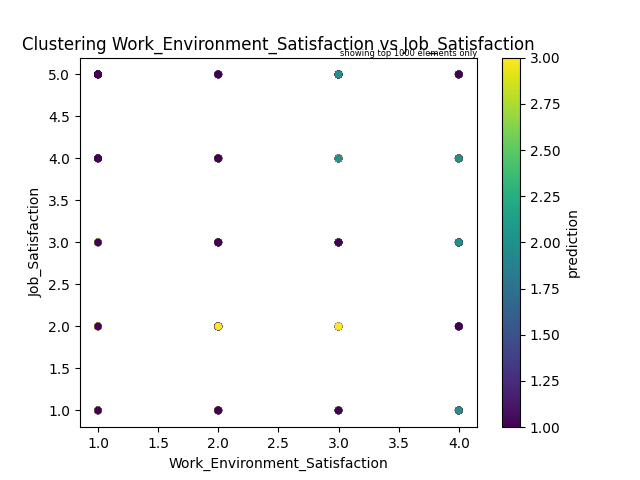

In [78]:
# Plot clusters
cluster_scatter(clusters, 'Work_Environment_Satisfaction','Job_Satisfaction', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

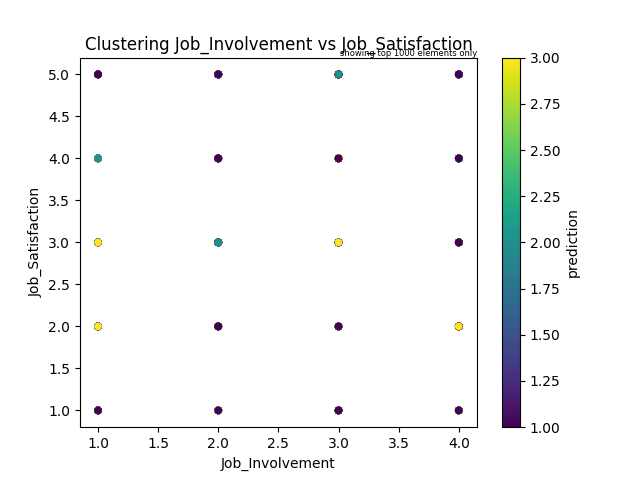

In [79]:
# Plot clusters
cluster_scatter(clusters, 'Job_Involvement','Job_Satisfaction', 'prediction')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

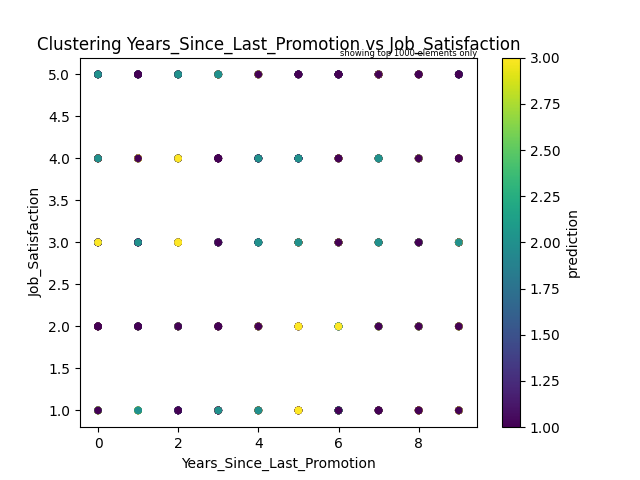

In [80]:
# Plot clusters
cluster_scatter(clusters, 'Years_Since_Last_Promotion','Job_Satisfaction', 'prediction')
%matplot plt

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

## Concluding Remarks for Possible Next Steps

- **MORE DATA** for training and testing is always useful for model improvements.
- Look into **other factors** that may be significant that are currently not in the dataset, and include them in further analysis and modeling.
- **Further hyperparameter tuning**; increase variety or widen range of values to evaluate and include testing other hyperparameters like *number of trees or estimators*, and *maximum iterations*. Maybe also try doing **Random Search** for tuning, and setting **different seed values** as well.
- Try performing **Oversampling Techniques**; this dataset does look to have a class imbalance, favoring `Non-Attrited` labels more than `Attrited`.
- Try implementing other techniques like **Support Vector Machines, Naive-Bayes or Neural Networks.**
- Perhaps also look into **Principal Component Analysis (PCA)** for dimension reduction, and compare performance measures before and after application to see if method would be beneficial.
- Lastly of course, continue to consider availability of computational resources, budget and processing/training time.